<h1><center>  Analyse de diagnostic de performances énergétiques pour les logements par habitation <h1><center> 



```

```

## Sujet

Vous travaillez au sein d'une direction Transition Énergétique développant des projets de rénovation énergétique des  bâtiments et de développement d'énergies renouvelables.
Que proposez-vous, sur la base entre-autres de ces données, pour permettre une meilleure exploitation et valorisation 
de celles-ci en vue d'alimenter les réflexions et les projets des collègues de la direction ?

## Introduction



Au sein de la direction de transition énergétique, le développement de projets de rénovation énergétique des bâtiments et le développement d’énergies renouvelables doivent permettre l’amélioration de la performance énergétique des bâtiments qui a pour but de réduire la consommation globale d'énergie. 
Avant que toute mesure d'économie d'énergie du bâtiment ne soit prise, un processus d'évaluation et de diagnostic de la performance énergétique doit être mené pour identifier les zones de faible performance, la quantité d'utilisation d'énergie anormale et les causes probables. En amont de toutes ces phases de mesures prises pour développer des projets de rénovation il est important d’abord de traités les données à disposition, les analyser et puis faire une analyse globale sur le sujet.


Les enjeux liés à la rénovation énergétique nécessitent de disposer d’une bonne connaissance de la consommation énergétique des logements. Ainsi, cet exercice présente une photographie de l'état du parc de l'ensemble des logements provenant d'un échantillon des données issues de l'ADEME.



## I. Import Librairies

In [ ]:
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests

## II.Import Data via l'API

In [ ]:
SIZE = 100
PAGE_COUNT =  100
URL = "https://koumoul.com/s/data-fair/api/v1/datasets/dpe-france/lines?size={}&page={}"
results = []

for page in range(PAGE_COUNT):
     response = requests.get(URL.format(SIZE, page+1))
     result = response.json()["results"]
     results += result
     #print("*"*100)





In [ ]:
df = pd.DataFrame(results)

In [ ]:
df.shape

(10000, 22)

In [ ]:
# df.to_csv("df.csv")

In [ ]:
# df = pd.read_csv('df.csv')

L'utilisation de l'API va nous permetre de récupérer les données. Pandas va nous permettre de faire le traitemement, le nettoyage et le calcul sur les données.

## II. Exploratory Data Analysis (EDA) and prepocessing

## II. Nettoyage de notre DataFrame

Le suivi des objectifs de la France, ainsi que le pilotage de la politique en matière de rénovation énergétique, rendent nécessaire de correctement observer les performances énergétiques du parc de logements. Il est ainsi nécessaire de mettre en œuvre une méthode exploitante correctement les données des diagnostics de performance énergétique (DPE), collectées par l’Ademe.

Le nettoyage des données consiste à s'assurer que les données sont correctes, cohérentes et utilisables. Le but de cette première partie est d'identifier les erreurs ou les corruptions, en les corrigeant ou en les supprimant, ou en traitant manuellement les données si nécessaire pour éviter que les mêmes erreurs ne se produisent.
Cette partie représente un élément essentiel de la gestion des données afin de permettre une meilleure exploitation


###  Présentation des variables 

In [ ]:
df.columns.to_list()

['classe_consommation_energie',
 'tr001_modele_dpe_type_libelle',
 'annee_construction',
 '_geopoint',
 'latitude',
 'surface_thermique_lot',
 '_i',
 'tr002_type_batiment_description',
 'geo_adresse',
 '_rand',
 'code_insee_commune_actualise',
 'estimation_ges',
 'geo_score',
 'classe_estimation_ges',
 'version_methode_dpe',
 'nom_methode_dpe',
 'tv016_departement_code',
 'consommation_energie',
 'date_etablissement_dpe',
 'longitude',
 '_score',
 '_id']

In [ ]:
df.shape

(10000, 22)

Nous disposons de 10000 observations dans notre jeu de données. Chaque ligne dans notre jeu de données représente un logement avec 22 variables relatives aux informations sur la performance énergétique d’un logement.

Notre DataFrame comporte de nombreux indicateurs. Ces derniers se décomposent en trois catégories:

•	**Les informations "clé" du DPE** : données concernant les étiquettes énergie et émissions de gaz à effet de serre du logement. Ces données correspondent aux indicateurs suivants :
- La consommation énergie en kWhEP/m².an;
- Le classement consommation d'énergie;
- L'estimation d'émission de gaz à effet de serre (GES) en Kg eqCO2/m².an;
- Le classement GES.



•	Les éléments d'identification et de géolocalisation du logement ou du bâtiment : adresse postale complète, coordonnées géographiques, type de bâtiment.

•	Les éléments techniques qui entrent dans le calcul DPE avec des données détaillées  (surface, date de construction), la méthode de calcul du DPE.


### Fusionner une table contenant le code de département et le nom de la région afin de faire des analyses par région

Au sein de notre DataFrame nous disposons de la variable "TV016_departement_code" qui représente le code Insee pour chaque département. Pour pouvoir mettre en place des analyses par région nous avons décidé d'ajouter à notre DataFrame la Région de chaque bâtiment.

In [ ]:
df5 = pd.read_excel(r'ensemble.xlsx')

In [ ]:
df6 = df5.drop_duplicates()

In [ ]:
df6.rename(columns = {'Code département': 'tv016_departement_code'},inplace = True ) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df = pd.merge(df, df6)  
print(df.shape)


(10000, 23)


In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
df["Nom de la région"].unique()

array(['Auvergne-Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand-Est', 'Occitanie',
       'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Corse', 'Pays de la Loire',
       'Île-de-France'], dtype=object)

In [ ]:
def calculateFillRate(df):
  nbr_rows = len(df.index)
  nbr_columns = len(df.columns)
  fillRate = []
  for column in df.columns:
    fillRate.append(100 * (nbr_rows - df[column].isna().sum()) / nbr_rows)
  return fillRate

In [ ]:
def showFillRate(df):
  fillRate = calculateFillRate(df)
  nbr_columns = len(df.columns)
  x = np.linspace(0, nbr_columns, nbr_columns)
  y = fillRate
  z = [40 for i in range(nbr_columns)]
  plt.figure(figsize=(15,10))
  plt.scatter(x,y)

  plt.plot(x,z, color='red')
  plt.show()
  print(y)

In [ ]:
df.shape

(10000, 23)

In [ ]:
df.head(5)

,classe_consommation_energie,tr001_modele_dpe_type_libelle,annee_construction,_geopoint,latitude,surface_thermique_lot,_i,tr002_type_batiment_description,geo_adresse,_rand,code_insee_commune_actualise,estimation_ges,geo_score,classe_estimation_ges,version_methode_dpe,nom_methode_dpe,tv016_departement_code,consommation_energie,date_etablissement_dpe,longitude,_score,_id,Nom de la région
0,C,Vente,5200,"46.3333359,5.4893103",46.333336,190.00,1,Maison Individuelle,Impasse du Tilleul (Chemin) Charnod,353429,01430,29.00,0.81,D,"3CL-DPE, version 1.3",3CL,01,132.00,2013-04-12,5.489310,None,ZsjVbXgBPUBpe-3d-He8,Auvergne-Rhône-Alpes
1,E,Vente,1,"48.8474569,2.4369967",48.847457,106.87,2,Maison Individuelle,28 avenue du Château (Parking à vélos) Vincennes,959550,01450,9.00,0.77,B,NaN,Méthode Facture,01,286.00,2013-04-15,2.436997,None,Z8jVbXgBPUBpe-3d-He8,Auvergne-Rhône-Alpes
2,E,Vente,1976,"48.3731394,6.9259729",48.373139,102.38,3,Maison Individuelle,Chemin de la Bruyère Moyenmoutier,718256,63000,18.20,0.79,C,Version 1.3,3CL,01,319.91,2013-04-08,6.925973,None,aMjVbXgBPUBpe-3d-He8,Auvergne-Rhône-Alpes
3,C,Vente,2004,NaN,NaN,114.80,4,Maison Individuelle,NaN,85362,63000,34.65,0.00,D,Version 1.3,3CL,01,148.09,2013-04-05,NaN,None,acjVbXgBPUBpe-3d-He8,Auvergne-Rhône-Alpes
4,D,Vente,2000,"46.1890848,5.6834292",46.189085,120.62,5,Maison Individuelle,Le Village-d'en-haut (Zone résidentielle) Charix,60242,01340,11.00,0.89,C,"3CL-DPE, version 1.3",Méthode 3CL,01,210.00,2013-04-16,5.683429,None,asjVbXgBPUBpe-3d-He8,Auvergne-Rhône-Alpes


**Création d'une fonction qui permet d'observer le taux de remplissage pour chaque variable présente dans notre jeu de données. La droite Horizontale représente un seuil qui définit un taux de remplissage égale à 40%. On remarque qu'aucun point ne se situe en dessous de cette droite. La plupart de nos données sont complètes**

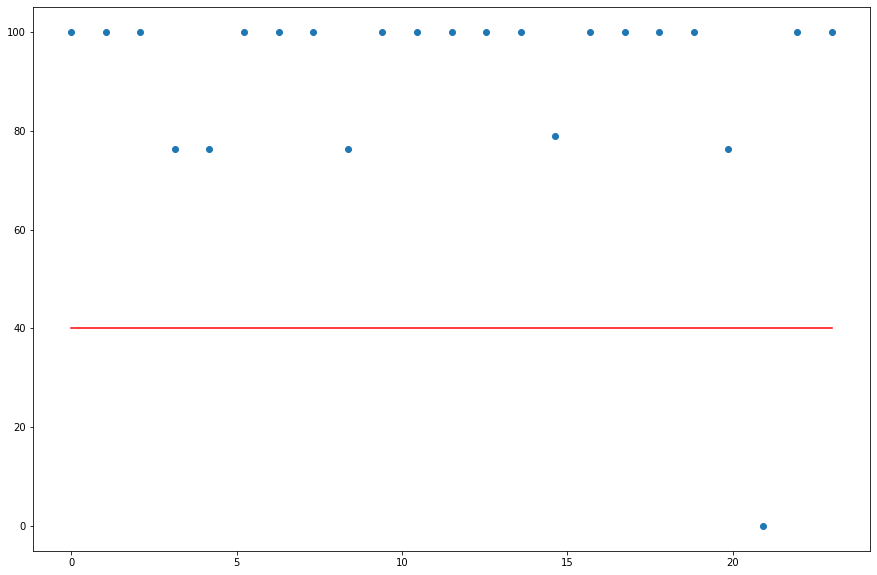

[100.0, 100.0, 100.0, 76.28, 76.28, 99.97, 100.0, 100.0, 76.28, 100.0, 99.91, 100.0, 100.0, 100.0, 78.94, 100.0, 100.0, 100.0, 100.0, 76.28, 0.0, 100.0, 100.0]


In [ ]:
showFillRate(df)

**Le nombre de valeures manquantes pour chaques variables**

In [ ]:
df.isna().sum()

classe_consommation_energie            0
tr001_modele_dpe_type_libelle          0
annee_construction                     0
_geopoint                           2372
latitude                            2372
surface_thermique_lot                  3
_i                                     0
tr002_type_batiment_description        0
geo_adresse                         2372
_rand                                  0
code_insee_commune_actualise           9
estimation_ges                         0
geo_score                              0
classe_estimation_ges                  0
version_methode_dpe                 2106
nom_methode_dpe                        0
tv016_departement_code                 0
consommation_energie                   0
date_etablissement_dpe                 0
longitude                           2372
_score                             10000
_id                                    0
Nom de la région                       0
dtype: int64

**Nous affichons le type de chaques variables **

In [ ]:
print(df.dtypes)

classe_consommation_energie         object
tr001_modele_dpe_type_libelle       object
annee_construction                   int64
_geopoint                           object
latitude                           float64
surface_thermique_lot              float64
_i                                   int64
tr002_type_batiment_description     object
geo_adresse                         object
_rand                                int64
code_insee_commune_actualise        object
estimation_ges                     float64
geo_score                          float64
classe_estimation_ges               object
version_methode_dpe                 object
nom_methode_dpe                     object
tv016_departement_code              object
consommation_energie               float64
date_etablissement_dpe              object
longitude                          float64
_score                              object
_id                                 object
Nom de la région                    object
dtype: obje

Sur la base de ces données, voici les axes de réponses qui permettront une meilleure exploitation et valorisation des données afin d'alimenter les réflexions et les projets au sein de la direction transition Énergétique afin de développer des projets de rénovation énergétiques des

In [ ]:
df['nom_methode_dpe'].unique()

array(['3CL', 'Méthode Facture', 'Méthode 3CL', 'TROIS_CL_DPE',
       '3CL - DPE', 'FACTURE', 'FACTURE - DPE', 'Facture', 'DPE VIERGE',
       'FACTURE SEULE', '3CL-DPE', 'MIXTE FACTURE+3CL - DPE pour ECS',
       '3cl', 'fact', 'pas fact', 'factl', 'TH_C_E', 'facture',
       '3CL-2012', 'ThCE 2005', 'Factures', 'Th-C-E'], dtype=object)

**Important** : On remarque que les occurrences concernant le nom de la méthode DPE sont écrites de manière différente ( exemple 3 CL, 3 CL-DPE, Méthode 3 CL). Il faudrait avoir une écriture unique pour chaque méthode de calcul du DPE afin de faciliter l'analyse

In [ ]:
df['nom_methode_dpe'].value_counts()

Méthode 3CL                         3244
3CL - DPE                           2773
Méthode Facture                     2106
FACTURE - DPE                        684
TROIS_CL_DPE                         595
FACTURE                              366
3CL                                  161
Th-C-E                                15
Facture                               11
facture                                9
fact                                   5
MIXTE FACTURE+3CL - DPE pour ECS       5
3cl                                    5
3CL-DPE                                4
Factures                               4
FACTURE SEULE                          3
pas fact                               3
3CL-2012                               2
DPE VIERGE                             2
TH_C_E                                 1
factl                                  1
ThCE 2005                              1
Name: nom_methode_dpe, dtype: int64

En raison des biais que peut engendrer le calcul du DPE à partir des factures, qui s’impose réglementairement pour ces logements on peut décider dans une analyse future de travailler uniquement avec des logements qui ont pour méthode de calcul la méthode 3 cl qui est la plus conventionnelle désormais.

In [ ]:
# df.annee_construction

In [ ]:
# for i in range (len(df["annee_construction"])):
#     print(df['annee_construction'][i])

In [ ]:
# for col in df.select_dtypes('object'):
#     plt.figure()
#     df[col].value_counts().plot.pie()

In [ ]:
# sns.countplot(x='surface_thermique_lot', hue='classe_estimation_ges', data=df9)

Une valeur aberrante est une observation inhabituellement élevée ou basse. Les valeurs aberrantes peuvent avoir un effet disproportionné sur les résultats statistiques, tels que la moyenne, ce qui peut conduire à des interprétations trompeuses.

### Utilisation de graphiques pour identifier des valeurs aberrantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


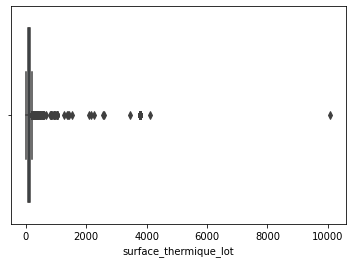

In [ ]:
import seaborn as sns
 
sns.boxplot(df['surface_thermique_lot'])

In [ ]:
df['surface_thermique_lot'].describe()

count     9997.000000
mean       122.690653
std        314.216999
min          0.000000
25%         62.900000
50%         87.000000
75%        119.000000
max      10084.000000
Name: surface_thermique_lot, dtype: float64

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
colonnes = ['tr001_modele_dpe_type_libelle','surface_thermique_lot','annee_construction','tr002_type_batiment_description']
#que l'on utilise en paramètre dans .loc[]
#pour la même restruction que précédemment
D= df.loc[(df['surface_thermique_lot'] > 2000 ),colonnes]
I= df.loc[(df['surface_thermique_lot'] > 8000),colonnes]

In [ ]:
D.head(10)

,tr001_modele_dpe_type_libelle,surface_thermique_lot,annee_construction,tr002_type_batiment_description
3330,Vente,2160.00,1956,Bâtiment collectif à usage principal d'habitation
3334,Vente,4120.00,1970,Bâtiment collectif à usage principal d'habitation
4619,Vente,2265.00,1962,Bâtiment collectif à usage principal d'habitation
5325,Vente,2591.00,1991,Bâtiment collectif à usage principal d'habitation
7257,Vente,3443.00,1978,Bâtiment collectif à usage principal d'habitation
7258,Vente,2098.00,1973,Bâtiment collectif à usage principal d'habitation
7259,Vente,2544.00,1973,Bâtiment collectif à usage principal d'habitation
7307,Vente,10084.00,1947,Maison Individuelle
7547,Neuf,3770.92,2006,Maison Individuelle
7548,Neuf,3770.92,2006,Maison Individuelle


In [ ]:
I.head(5)

,tr001_modele_dpe_type_libelle,surface_thermique_lot,annee_construction,tr002_type_batiment_description
7307,Vente,10084.0,1947,Maison Individuelle


### Visualisation de la colonne anne_construction pour observer les valeurs aberrantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


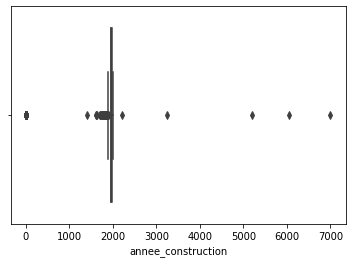

In [ ]:
import seaborn as sns
 
sns.boxplot(df['annee_construction'])

In [ ]:
colonnes = ['tr001_modele_dpe_type_libelle','classe_consommation_energie','annee_construction']
#que l'on utilise en paramètre dans .loc[]
#pour la même restruction que précédemment
print(df.loc[(df['annee_construction'] > 2020 ),colonnes])

     tr001_modele_dpe_type_libelle  ... annee_construction
0                            Vente  ...               5200
2930                      Location  ...               7000
8445                         Vente  ...               2207
8649                         Vente  ...               6060
8654                      Location  ...               3250

[5 rows x 3 columns]


In [ ]:
colonnes = ['tr001_modele_dpe_type_libelle','classe_consommation_energie','annee_construction']
#que l'on utilise en paramètre dans .loc[]
#pour la même restruction que précédemment
print(df.loc[(df['annee_construction'] < 1000),colonnes])

     tr001_modele_dpe_type_libelle  ... annee_construction
1                            Vente  ...                  1
54                           Vente  ...                  1
55                            Neuf  ...                  1
119                           Neuf  ...                  1
213                       Location  ...                  1
...                            ...  ...                ...
9836                         Vente  ...                  1
9851                         Vente  ...                  1
9872                         Vente  ...                  1
9910                         Vente  ...                  1
9929                      Location  ...                  1

[211 rows x 3 columns]


On décide de garder dans notre DataFrame les années qui sont supérieure à 1000 et inférieure à 2024

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
df = df.loc[(df['annee_construction'] > 1900) & (df['annee_construction'] < 2024)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6e1d25d0>]],
      dtype=object)

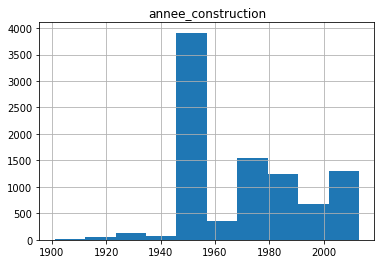

In [ ]:
df.hist(column='annee_construction')

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6e228790>,
      dtype=object)

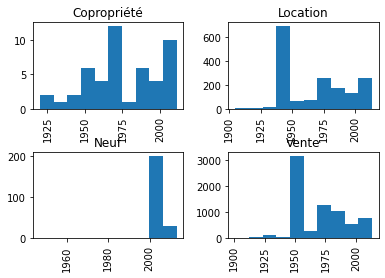

In [ ]:
df.hist(column='annee_construction',by='tr001_modele_dpe_type_libelle')

### Visualisation de la colonne estimation_ges pour observer les valeurs aberrantes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6d5c61d0>]],
      dtype=object)

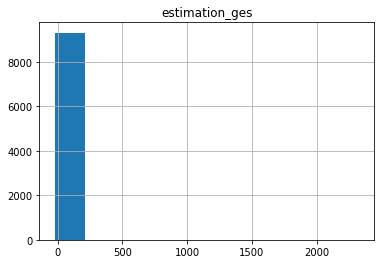

In [ ]:
df.hist(column='estimation_ges')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


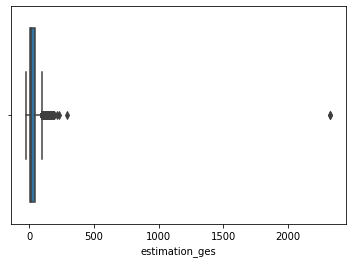

In [ ]:
sns.boxplot(df['estimation_ges'])

In [ ]:
df['estimation_ges'].describe()

count    9306.000000
mean       30.755168
std        45.051609
min       -24.000000
25%         9.000000
50%        19.000000
75%        46.000000
max      2326.330000
Name: estimation_ges, dtype: float64

In [ ]:
Pr = df.loc[(df['estimation_ges'] > 2300)]

In [ ]:
Pr.head(5)

,classe_consommation_energie,tr001_modele_dpe_type_libelle,annee_construction,_geopoint,latitude,surface_thermique_lot,_i,tr002_type_batiment_description,geo_adresse,_rand,code_insee_commune_actualise,estimation_ges,geo_score,classe_estimation_ges,version_methode_dpe,nom_methode_dpe,tv016_departement_code,consommation_energie,date_etablissement_dpe,longitude,_score,_id,Nom de la région
9798,F,Vente,1963,"48.803453,2.455976",48.803453,57.8,7,Logement,1 Rue Francis Picabia 94000 Créteil,969752,94028,2326.33,0.96,G,VERSION_2012,FACTURE,94,382.36,2013-04-29,2.455976,None,EQVSb3gBbFu1kB9kIFnv,Île-de-France
9799,F,Vente,1963,"48.803453,2.455976",48.803453,57.8,8,Logement,1 Rue Francis Picabia 94000 Créteil,560161,94028,2326.33,0.96,G,VERSION_2012,FACTURE,94,382.36,2013-04-29,2.455976,None,EgVSb3gBbFu1kB9kIFnv,Île-de-France


In [ ]:
# df.drop_duplicates(subset ="Customer id", keep = 'first', inplace=True)

In [ ]:
len((df.loc[(df['estimation_ges'] <= 0) & (df['classe_estimation_ges'] == "A")]))

81

In [ ]:
df.drop(df.loc[df['estimation_ges']<= 0].index, inplace=True)

### Visualisation de la colonne consommation_energie pour observer les valeurs aberrantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


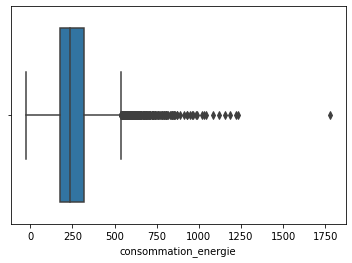

In [ ]:
sns.boxplot(df['consommation_energie'])

In [ ]:
print((df['consommation_energie']== 0).value_counts())

False    8348
Name: consommation_energie, dtype: int64


In [ ]:
df["consommation_energie"].describe()

count    8348.000000
mean      260.677040
std       128.032891
min       -25.460000
25%       175.710000
50%       237.555000
75%       320.172500
max      1779.460000
Name: consommation_energie, dtype: float64

In [ ]:
colonnes = ['tr001_modele_dpe_type_libelle','classe_consommation_energie','consommation_energie']
#que l'on utilise en paramètre dans .loc[]
#pour la même restruction que précédemment
print(df.loc[(df['consommation_energie'] < 5),colonnes])

     tr001_modele_dpe_type_libelle  ... consommation_energie
4807                         Vente  ...               -25.46
8694                      Location  ...                -4.00

[2 rows x 3 columns]


In [ ]:
df.drop(df.loc[df['consommation_energie']<= 0].index, inplace=True)

###La colonne classe de consommation_energie contients des valeurs aberrantes

In [ ]:
print((df['classe_consommation_energie']== "N").value_counts())

False    8235
True      111
Name: classe_consommation_energie, dtype: int64


In [ ]:
# df.drop(df.loc[df['classe_consommation_energie']=="N"].index, inplace=True)
# df.drop(df.loc[df['classe_consommation_energie']=="I"].index, inplace=True)

In [ ]:
df = df.loc[~df["classe_consommation_energie"].isin(["I", "N"])]

In [ ]:
df.shape

(8234, 23)

### Corrélation entre 2 variables catégorielle

In [ ]:
pip install scipy

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df["classe_estimation_ges"],df['classe_consommation_energie'])
resultats_test = chi2_contingency(table)


print("statistiques de test:", resultats_test[0])
print("p_valeur:", resultats_test[1])
print("degré de liberté:",resultats_test[2])

statistiques de test: 7567.099303042796
p_valeur: 0.0
degré de liberté: 36


**NOUVELLE REFORME**

Le décret n°2020-1610 du 17 décembre 2020 précise que pour tous les diagnostics DPE réalisés avant le 1er juillet 2021 leur durée de validité vont être réduits. Voici les dates à retenir pour un DPE réalisé entre le 1er janvier 2013 et le 30 juin 2021 :

Une date de validité au 31 décembre 2022 pour tous les diagnostics de performance énergétique réalisés entre le 1er janvier 2013 et le 31 décembre 2017.
Une date de validité au 31 décembre 2024 pour tous les DPE réalisés entre le 1er janvier 2018 et le 30 juin 2021.

Cette commande nous permet de compter combien de logement vont devoir renouveler leur DPE d'ici 1 an et demi. En changeant les dates on pourrait connaitre aussi le nombre de logements qui a un renouvellement de DPE à faire jusqu'en 2024

In [ ]:
len(df.loc[(df['date_etablissement_dpe'] >= "2013-01-01") & (df['date_etablissement_dpe'] < "2017-04-12")])

8233

In [ ]:
df.shape

(8234, 23)

Pour les logements récents, pas de problème au niveau du DPE. On pourrait identifier les logements qui devront renouveler leur DPE, car pour les biens énergivores les bailleurs d’appartements ou de maisons classées E, F ou G auraient, comme le conseille le ministère de la Transition écologique, tout intérêt à effectuer un DPE conforme au nouveau référentiel pour connaître précisément le classement de leur bien locatif. 

Les propriétaires d'habitations classées F et G ne peuvent plus augmenter le loyer lors du changement de locataire depuis le 1er janvier 2021 dans des secteurs tendus. Si la refonte du DPE permet à certains biens énergivores de conserver leur classement E, d’autres pourraient descendre d’une classe accédant au F avec à la clé de nouvelles obligations. 

On pourrait ainsi sensibiliser les acteurs et proposer des modifications afin de ne pas observer une descente de classe pour certains logements et aider à améliorer le DPE des logements . En ce sens, cette exploitation des données va permettrent d'affiner l'offre proposée aux particuliers et aux acteurs publics.

Récemment le gouvernement a travaillait sur une nouvelle formule de calcul de classe énergétique du DPE plus fiable. Plus aucun diagnostic DPE ne sera réalisé sur la base de facture de consommation.

On pourrait connaître combien de logements seront soumis à ce nouveau type de calcul au sein de notre jeu de données. Les changements du mode de calcul du DPE vont entraîner des changements de classe pour certaines habitations.On pourrait récupérer les identifiants de chaque logement qui repose sur des méthodes dites de factures puis observer par la suite, si en fonction de la nouvelle méthode de calcul pour ces logements, nous observons une augmentation ou diminution de la classe énergétique du DPE.

Ainsi on pourrait estimer le % de logement qui a augmenté d'une classe et ceux qui ont diminué d'une classe.

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
colonnes = ['classe_consommation_energie','nom_methode_dpe','_id','geo_adresse','tv016_departement_code']
#que l'on utilise en paramètre dans .loc[]
#pour la même restruction que précédemment
print(df.loc[(df['nom_methode_dpe'] == 'FACTURE'),colonnes])

     classe_consommation_energie  ... tv016_departement_code
290                            C  ...                     03
629                            G  ...                     06
743                            E  ...                     08
815                            D  ...                     08
1165                           E  ...                     12
...                          ...  ...                    ...
9839                           D  ...                     94
9840                           D  ...                     94
9844                           E  ...                     94
9845                           E  ...                     94
9884                           D  ...                     94

[98 rows x 5 columns]


In [ ]:
colonnes = ['classe_consommation_energie','nom_methode_dpe','_id']
#que l'on utilise en paramètre dans .loc[]
#pour la même restruction que précédemment
print(df.loc[(df['nom_methode_dpe'] == 'FACTURE'),colonnes])
len((df.loc[(df['nom_methode_dpe'] == 'FACTURE'),colonnes]))

     classe_consommation_energie nom_methode_dpe                   _id
290                            C         FACTURE  D8jVbXgBPUBpe-3d_nn8
629                            G         FACTURE  Wkc2bngBhTP71p8HTuyt
743                            E         FACTURE  CFgfb3gBhTP71p8HCy2S
815                            D         FACTURE  UFgfb3gBhTP71p8HDC2-
1165                           E         FACTURE  rgvCbngBw4UrxyH6rYS8
...                          ...             ...                   ...
9839                           D         FACTURE  OgVSb3gBbFu1kB9kIFnv
9840                           D         FACTURE  OwVSb3gBbFu1kB9kIFnv
9844                           E         FACTURE  PwVSb3gBbFu1kB9kIFnv
9845                           E         FACTURE  QAVSb3gBbFu1kB9kIFnv
9884                           D         FACTURE  ZwVSb3gBbFu1kB9kIlkz

[98 rows x 3 columns]


98

Le DPE devient donc, dès cette année, au cœur de nouvelles obligations de grande importance et va permettre d’engager une lutte contre la location et l’achat de biens trop énergivores.

## Statistqiues

Nous pouvons observer dans notre jeu de données, combien on observe de passoires énergétiques

In [ ]:
df['classe_consommation_energie'].value_counts()

D    2608
E    2515
F    1237
C    1037
G     562
B     231
A      44
Name: classe_consommation_energie, dtype: int64

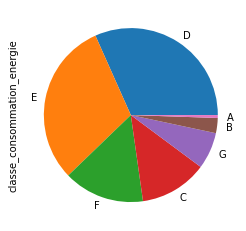

In [ ]:
df['classe_consommation_energie'].value_counts().plot.pie()

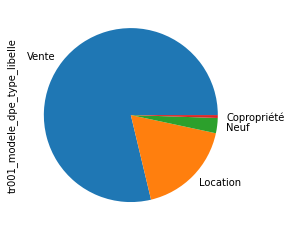

In [ ]:
df['tr001_modele_dpe_type_libelle'].value_counts().plot.pie()

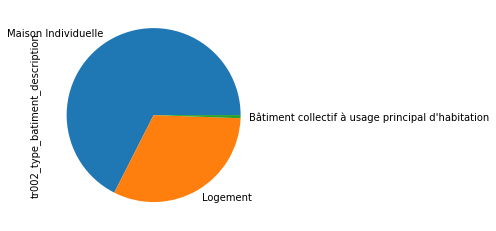

In [ ]:
df['tr002_type_batiment_description'].value_counts().plot.pie()

Au sein de notre échantillon, nous disposons de 200 passoires énergétiques (étiquettes F et G).,

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

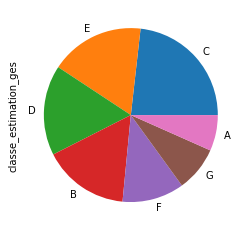

In [ ]:
df['classe_estimation_ges'].value_counts().plot.pie()

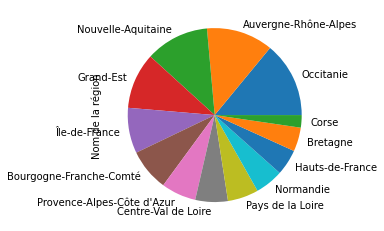

In [ ]:
df['Nom de la région'].value_counts().plot.pie()

Dans le but du developpement des ENR , ce qui sera préconisé:

1er janvier 2025 : les logements classés G seront jugés indécents et ne pourront plus être loués.
1er janvier 2028 : les logements classés F seront jugés indécents et ne pourront plus être loués.
1er janvier 2034 : les logements classés E seront jugés indécents et ne pourront plus être loués.

On pourrait s'intéresser au nombre de logements qui vont être jugés indécent et qui ne pourraient plus être loués

1er janvier 2023 : les logements qui présentent une consommation énergétique dépassant 450 kwhep/m²/an seront jugés indécents et ne pourront plus être loués. Il est important alors de pouvoir dans un premier temps les identifier

In [ ]:
print(df.loc[(df['consommation_energie'] > 450)])

     classe_consommation_energie  ...      Nom de la région
8                              G  ...  Auvergne-Rhône-Alpes
10                             G  ...  Auvergne-Rhône-Alpes
14                             G  ...  Auvergne-Rhône-Alpes
17                             G  ...  Auvergne-Rhône-Alpes
60                             G  ...  Auvergne-Rhône-Alpes
...                          ...  ...                   ...
9963                           G  ...         Île-de-France
9980                           G  ...         Île-de-France
9989                           G  ...         Île-de-France
9992                           G  ...         Île-de-France
9998                           G  ...         Île-de-France

[564 rows x 23 columns]


In [ ]:
len(df.loc[(df['consommation_energie'] > 450)])

564

### En fonction de la classe énergétique quel est la moyenne de la consommation en énergie

E
280.6596858846913
C
125.92538090646092
D
194.72328987730089
G
572.9329715302488
F
387.7199029911071
B
72.44787878787872
A
36.32727272727273


<BarContainer object of 7 artists>

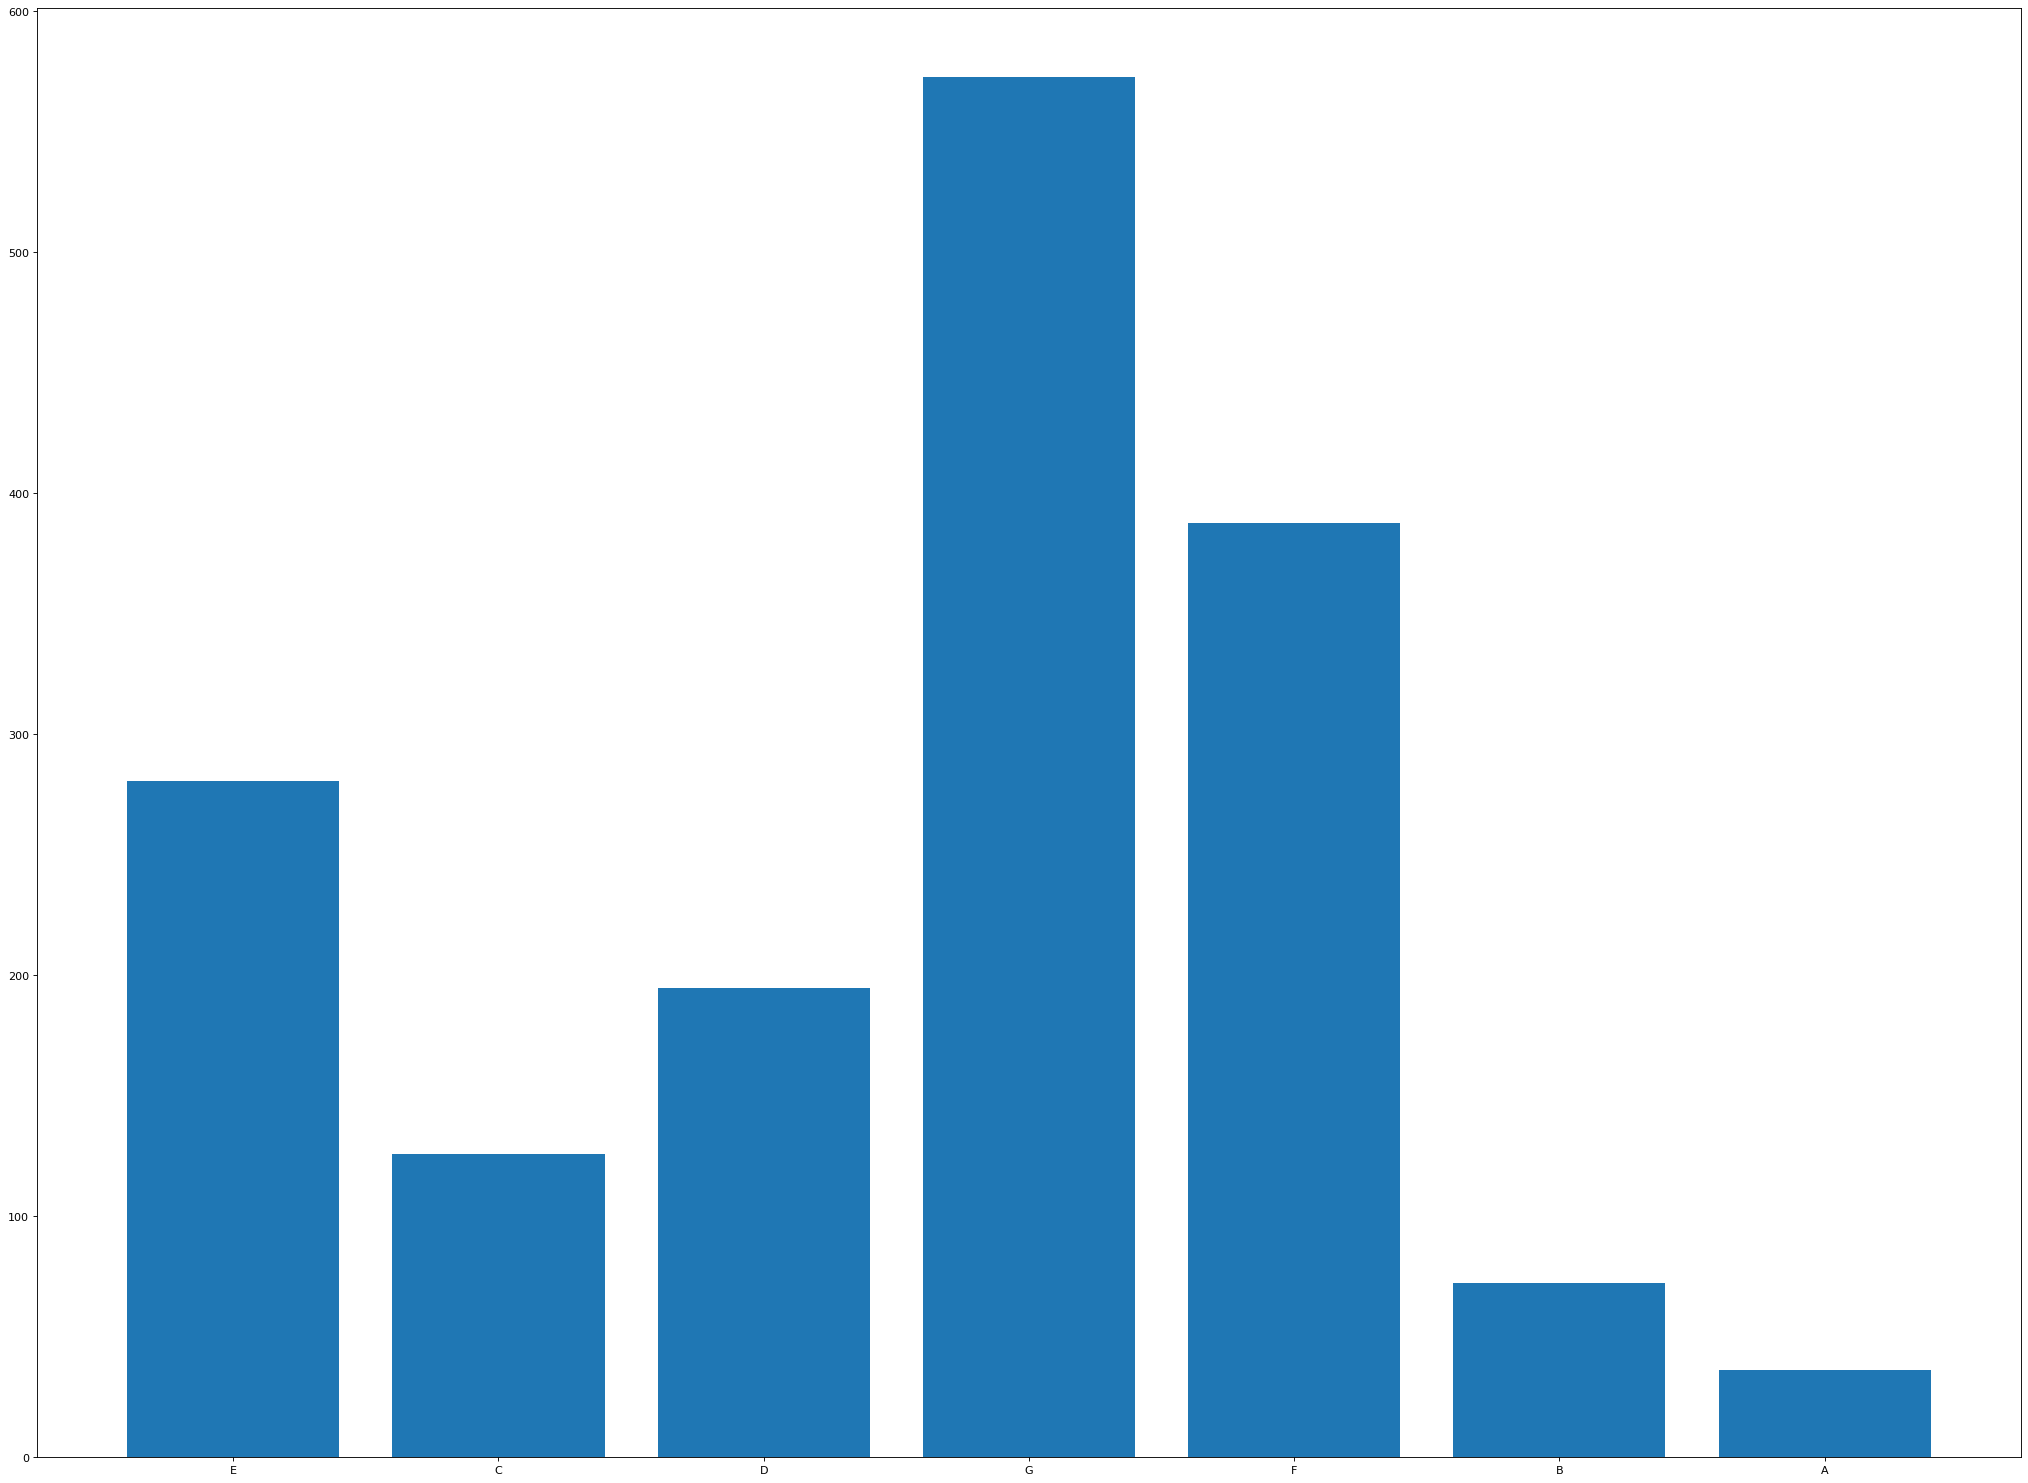

In [ ]:
position = (df['classe_consommation_energie']).unique()
market_value_league = np.zeros(len(position))
j=0
for i in (position):
    print(i)
    market_value_league[j] = ((df['consommation_energie'][df['classe_consommation_energie']==i].mean()))
    print(market_value_league[j])
    j+=1

    
market_value_league
fig = plt.figure(1,figsize=(32,24),dpi = 80)

plt.bar(position,market_value_league)

### Visualisation de la position GPS des logements 

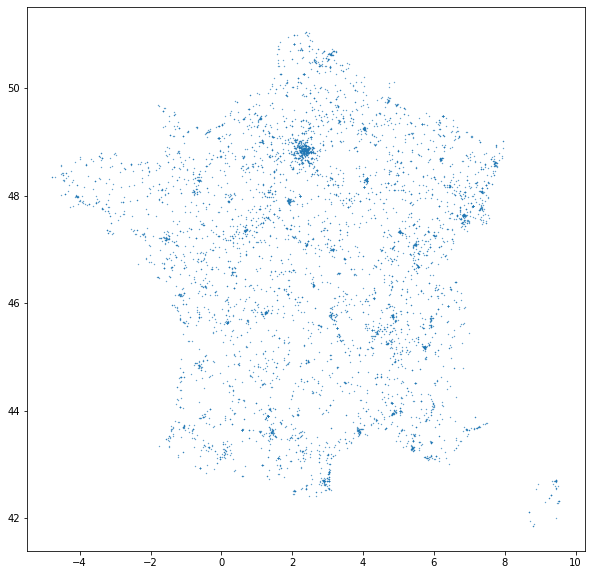

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df.longitude, df.latitude, s=0.1)

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
Viz = df.loc[(df['classe_estimation_ges'] == "G") & (df['classe_consommation_energie'] == "G")]

In [ ]:
Viz.shape

(152, 23)

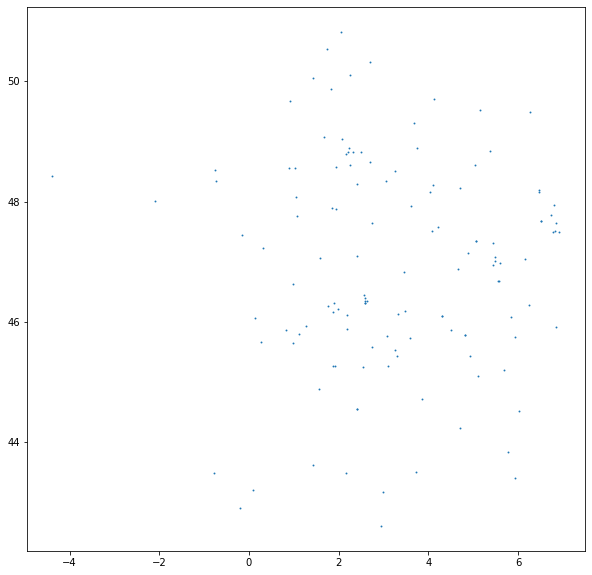

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Viz.longitude, Viz.latitude, s=0.8)

In [ ]:
import folium
import pandas as pd


locations = Viz[['latitude', 'longitude']].copy()
locations.dropna(inplace=True)

locationlist = locations.values.tolist()

map = folium.Map(location=[47.088615, 2.637424], zoom_start=6)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

map
map.save("index.html")

In [ ]:
map

In [ ]:
Viz1 = df.loc[(df['classe_consommation_energie'] == "F") + (df['classe_consommation_energie'] == "G")]

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [ ]:
Viz1.shape

(1799, 23)

In [ ]:
import folium
import pandas as pd


locations = Viz1[['latitude', 'longitude']].copy()
locations.dropna(inplace=True)

locationlist = locations.values.tolist()

map = folium.Map(location=[47.088615, 2.637424], zoom_start=6)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

map


In [ ]:
# import folium
# import pandas as pd


# locations = df[['latitude', 'longitude']].copy()
# locations.dropna(inplace=True)

# locationlist = locations.values.tolist()

# map = folium.Map(location=[47.088615, 2.637424], zoom_start=6)
# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point]).add_to(map)

# map
# map.save("index.html")

### En fonction de chaque régions de France, quel est la consommation en énergie moyenne 

Auvergne-Rhône-Alpes
274.52116552399593
Hauts-de-France
285.33343434343436
Provence-Alpes-Côte d'Azur
259.7560225140714
Grand-Est
265.28003496503504
Occitanie
250.83897835497837
Normandie
272.27851508120654
Nouvelle-Aquitaine
241.2624768756424
Centre-Val de Loire
285.5836345381526
Bourgogne-Franche-Comté
272.54959564541235
Bretagne
261.3407923497268
Corse
224.75811518324608
Pays de la Loire
230.5349894291765
Île-de-France
284.43007183908065


<BarContainer object of 13 artists>

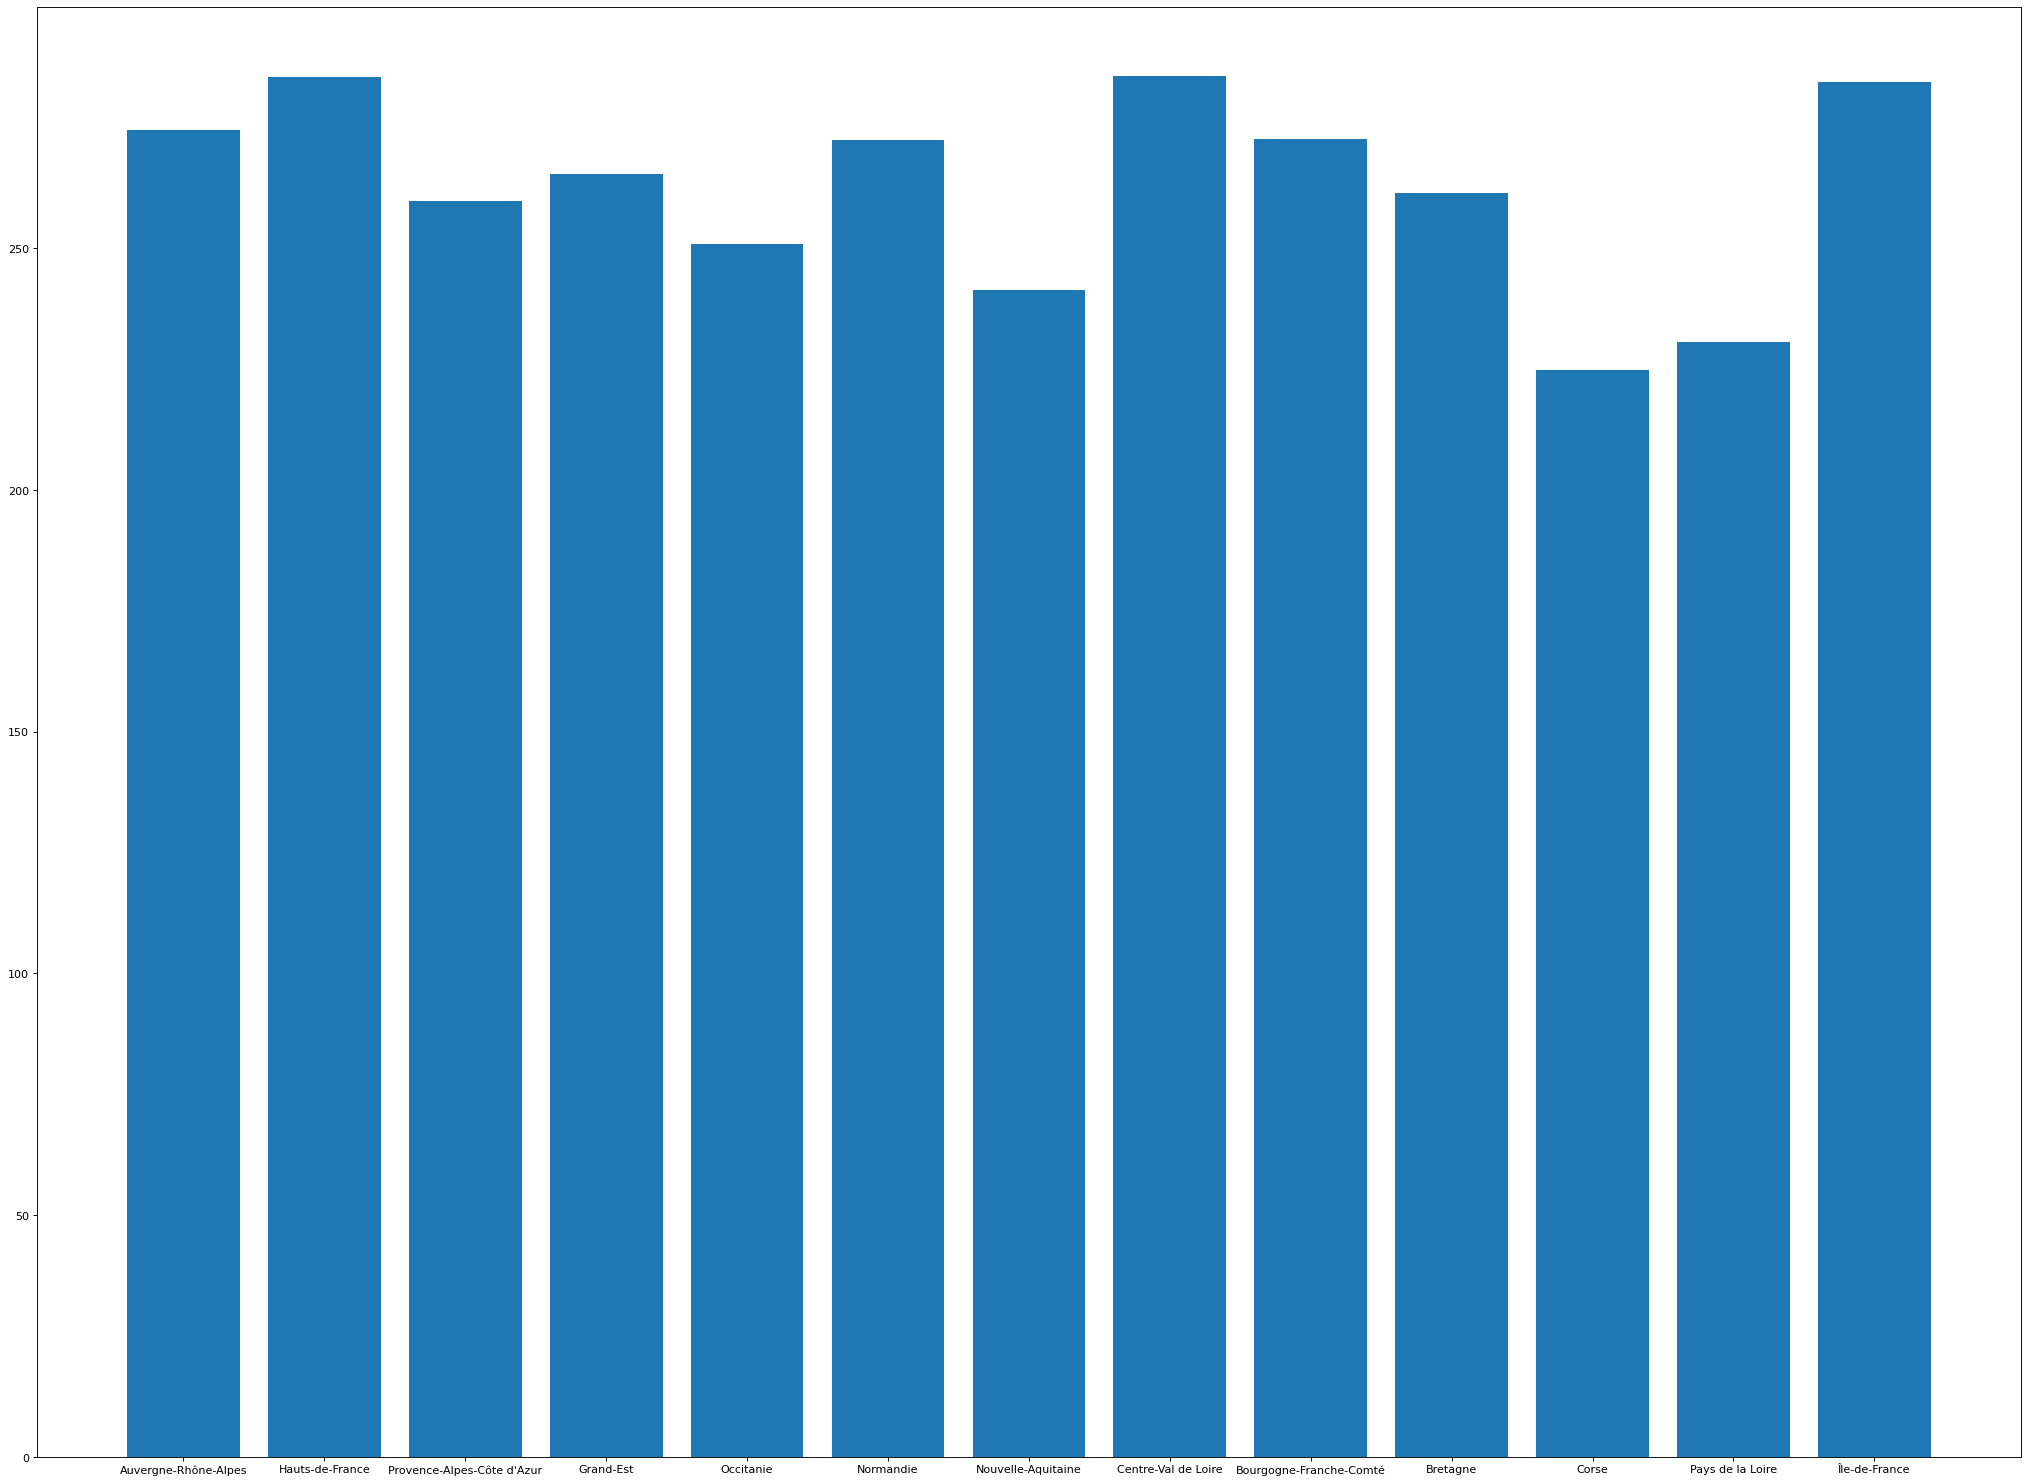

In [ ]:
position = (df['Nom de la région']).unique()
market_value_league = np.zeros(len(position))
j=0
for i in (position):
    print(i)
    market_value_league[j] = ((df['consommation_energie'][df['Nom de la région']==i].mean()))
    print(market_value_league[j])
    j+=1

    
market_value_league
fig = plt.figure(1,figsize=(32,24),dpi = 80)

plt.bar(position,market_value_league)

### En fonction de chaque région, quel est la moyenne de l'estimation de gaz à effet de serre

Auvergne-Rhône-Alpes
38.77756121449563
Hauts-de-France
40.98060606060607
Provence-Alpes-Côte d'Azur
25.914784240150095
Grand-Est
40.38742424242427
Occitanie
28.425558441558433
Normandie
33.88443155452435
Nouvelle-Aquitaine
29.924748201438856
Centre-Val de Loire
33.83987951807232
Bourgogne-Franche-Comté
41.6698600311042
Bretagne
32.958852459016384
Corse
16.35277486910995
Pays de la Loire
28.63494714587737
Île-de-France
46.55897988505749


<BarContainer object of 13 artists>

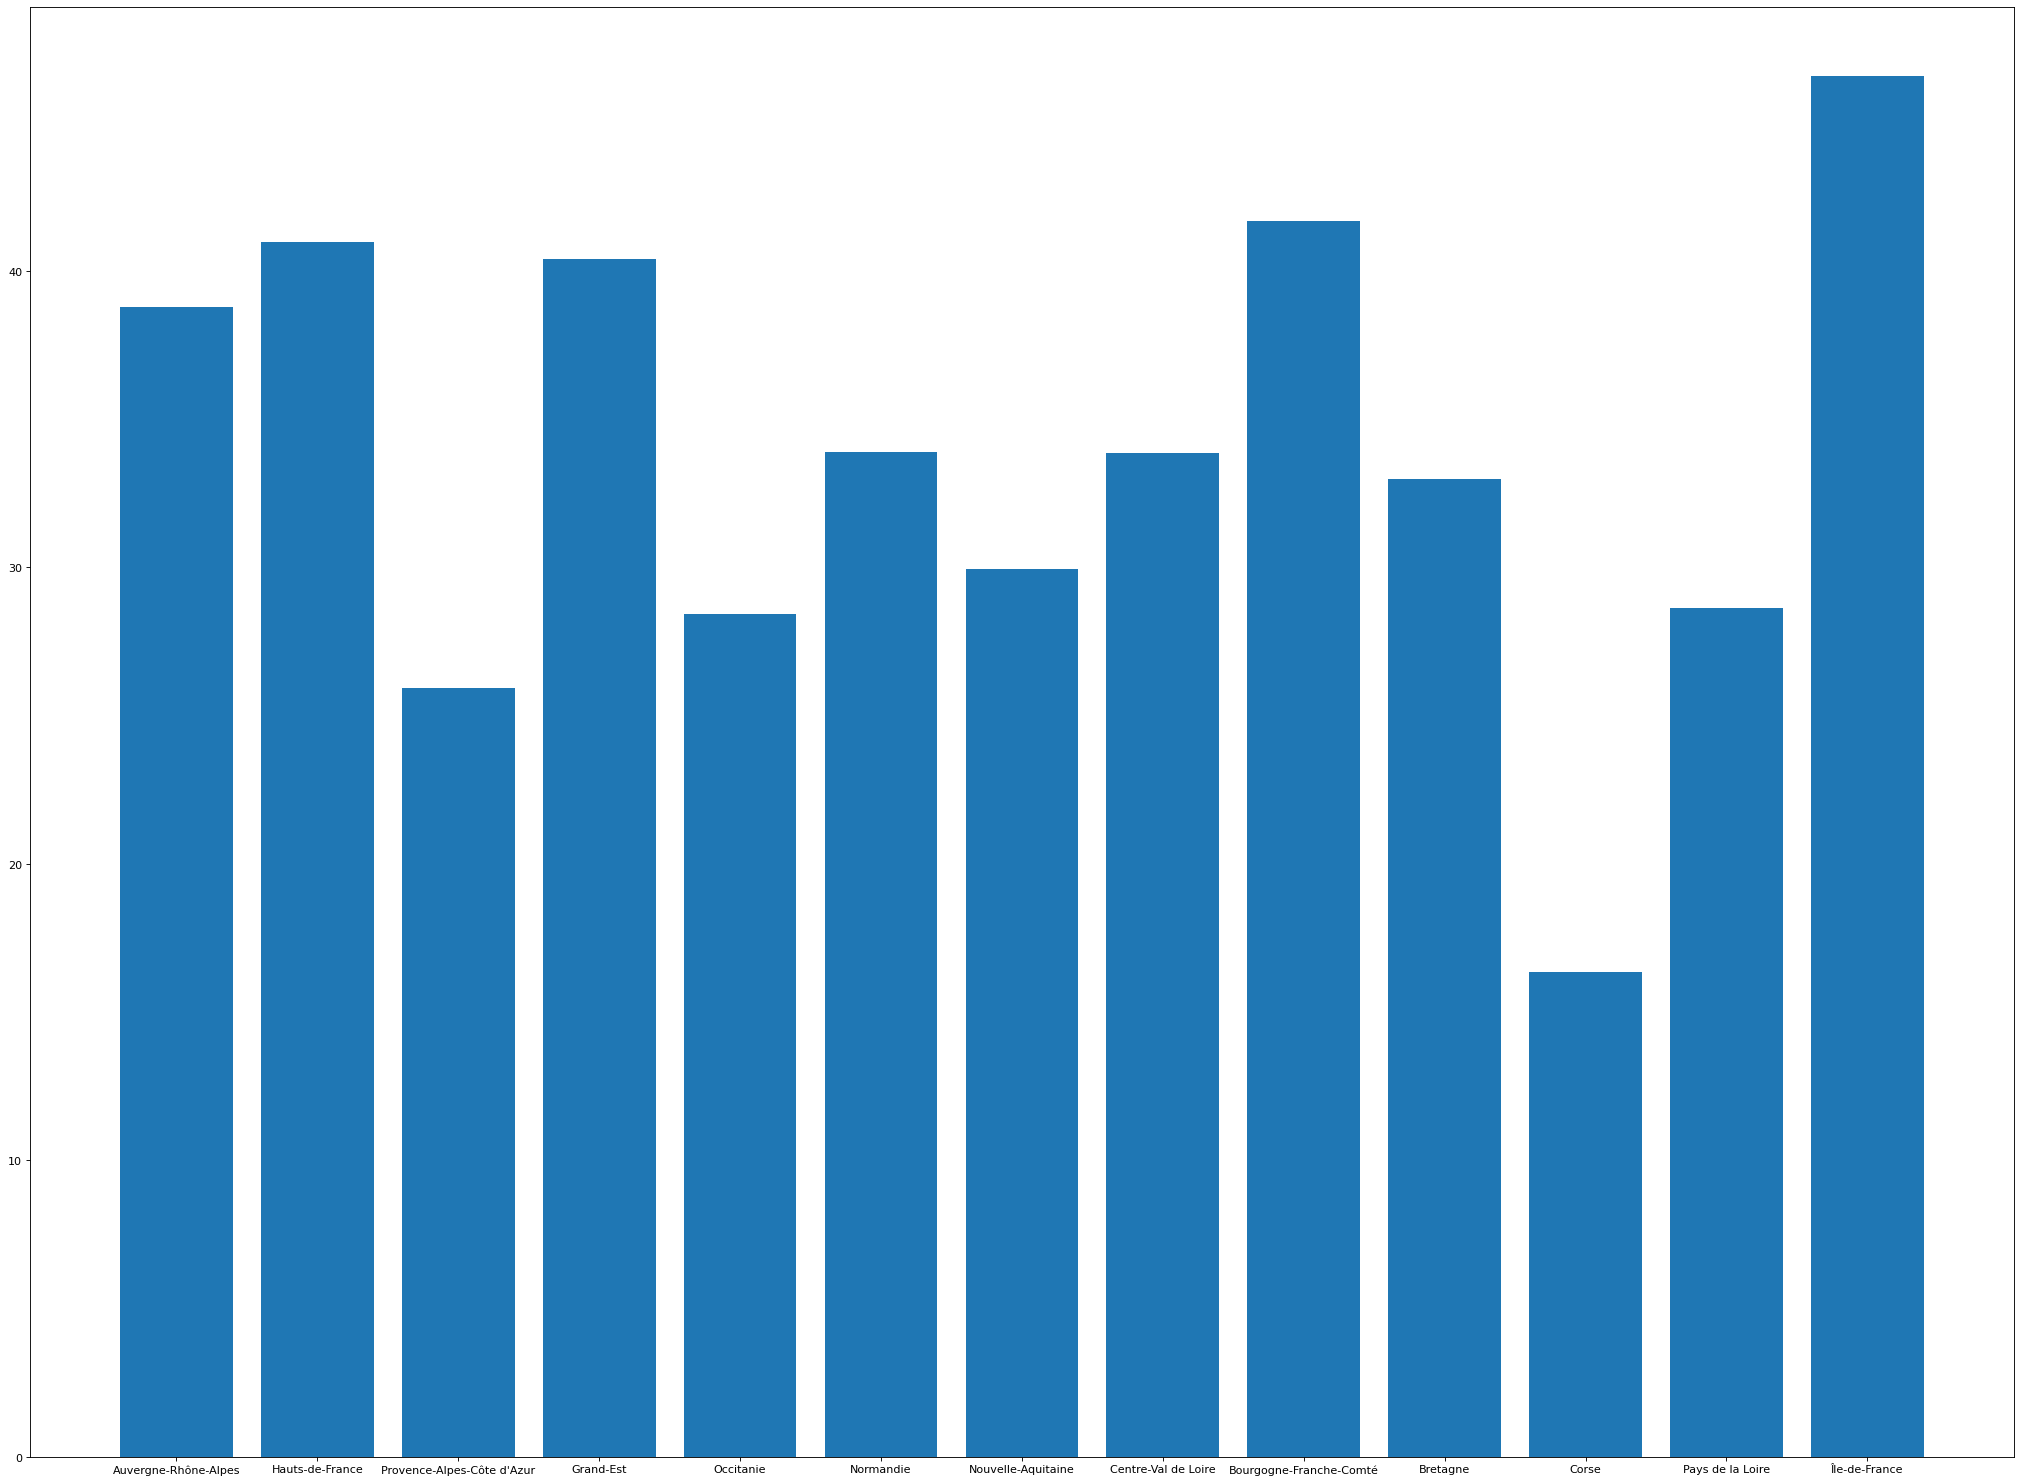

In [ ]:
position = (df['Nom de la région']).unique()
market_value_league = np.zeros(len(position))
j=0
for i in (position):
    print(i)
    market_value_league[j] = ((df['estimation_ges'][df['Nom de la région']==i].mean()))
    print(market_value_league[j])
    j+=1

    
market_value_league
fig = plt.figure(1,figsize=(32,24),dpi = 80)

plt.bar(position,market_value_league)

In [ ]:
results = df.groupby("Nom de la région").aggregate({"estimation_ges": "mean"}).reset_index()

In [ ]:
results

,Nom de la région,estimation_ges
0,Auvergne-Rhône-Alpes,38.777561
1,Bourgogne-Franche-Comté,41.669860
2,Bretagne,32.958852
3,Centre-Val de Loire,33.839880
4,Corse,16.352775
5,Grand-Est,40.387424
6,Hauts-de-France,40.980606
7,Normandie,33.884432
8,Nouvelle-Aquitaine,29.924748
9,Occitanie,28.425558


In [ ]:
df["Nom de la région"].value_counts()

Occitanie                     1155
Auvergne-Rhône-Alpes          1021
Nouvelle-Aquitaine             973
Grand-Est                      858
Île-de-France                  696
Bourgogne-Franche-Comté        643
Provence-Alpes-Côte d'Azur     533
Centre-Val de Loire            498
Pays de la Loire               473
Normandie                      431
Hauts-de-France                396
Bretagne                       366
Corse                          191
Name: Nom de la région, dtype: int64

### Decouper notre jeu de données, en s'interessant à la location des batiments

In [ ]:
location = (df.loc[df['tr001_modele_dpe_type_libelle']=="Location",:])

In [ ]:
location.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
location.shape

(1475, 23)

In [ ]:
Z = location[['classe_consommation_energie', 'consommation_energie']].groupby(['classe_consommation_energie']).mean()

In [ ]:
Z

,consommation_energie
classe_consommation_energie,
A,39.000000
B,78.227857
C,124.735902
D,194.939763
E,280.994970
F,384.128957
G,566.937105


Faire un tableau qui regroupe la consommation en énergie moyenne pour chaque classe de consommation pour les bâtiments en location

On pourrait aussi penser, au lieu de supprimer les valeurs aberrantes pour les consommations d'énergie = à 0 , attribuer en fonction du type du bâtiment(location, vente) et de la classe de consommation des bâtiments, la valeur aberrante par la moyenne de la consommation en énergie.

In [ ]:
df["tr001_modele_dpe_type_libelle"].value_counts()

Vente          6483
Location       1475
Neuf            232
Copropriété      44
Name: tr001_modele_dpe_type_libelle, dtype: int64

In [ ]:
vente = (df.loc[df['tr001_modele_dpe_type_libelle']=="Vente",:])

In [ ]:
Y = vente[['classe_consommation_energie', 'consommation_energie']].groupby(['classe_consommation_energie']).mean()

In [ ]:
Y

,consommation_energie
classe_consommation_energie,
A,32.781250
B,77.165055
C,126.165560
D,194.935198
E,280.860071
F,388.294470
G,573.870597


In [ ]:
Neuf = (df.loc[df['tr001_modele_dpe_type_libelle']=="Neuf",:])

In [ ]:
W = Neuf[['classe_consommation_energie', 'consommation_energie']].groupby(['classe_consommation_energie']).mean()

In [ ]:
W

,consommation_energie
classe_consommation_energie,
A,38.329630
B,67.170179
C,126.044706
D,185.049821
E,251.377500


In [ ]:
Copropriete = (df.loc[df['tr001_modele_dpe_type_libelle']=="Copropriété",:])

In [ ]:
Copropriete.shape

(44, 23)

In [ ]:
I = Copropriete[['classe_consommation_energie', 'consommation_energie']].groupby(['classe_consommation_energie']).mean()

In [ ]:
I

,consommation_energie
classe_consommation_energie,
C,128.601667
D,194.850000
E,281.988235
F,423.627143


Vente
268.60844053678926
Location
261.3393220338982
Copropriété
255.87954545454548
Neuf
112.46146551724145


<BarContainer object of 4 artists>

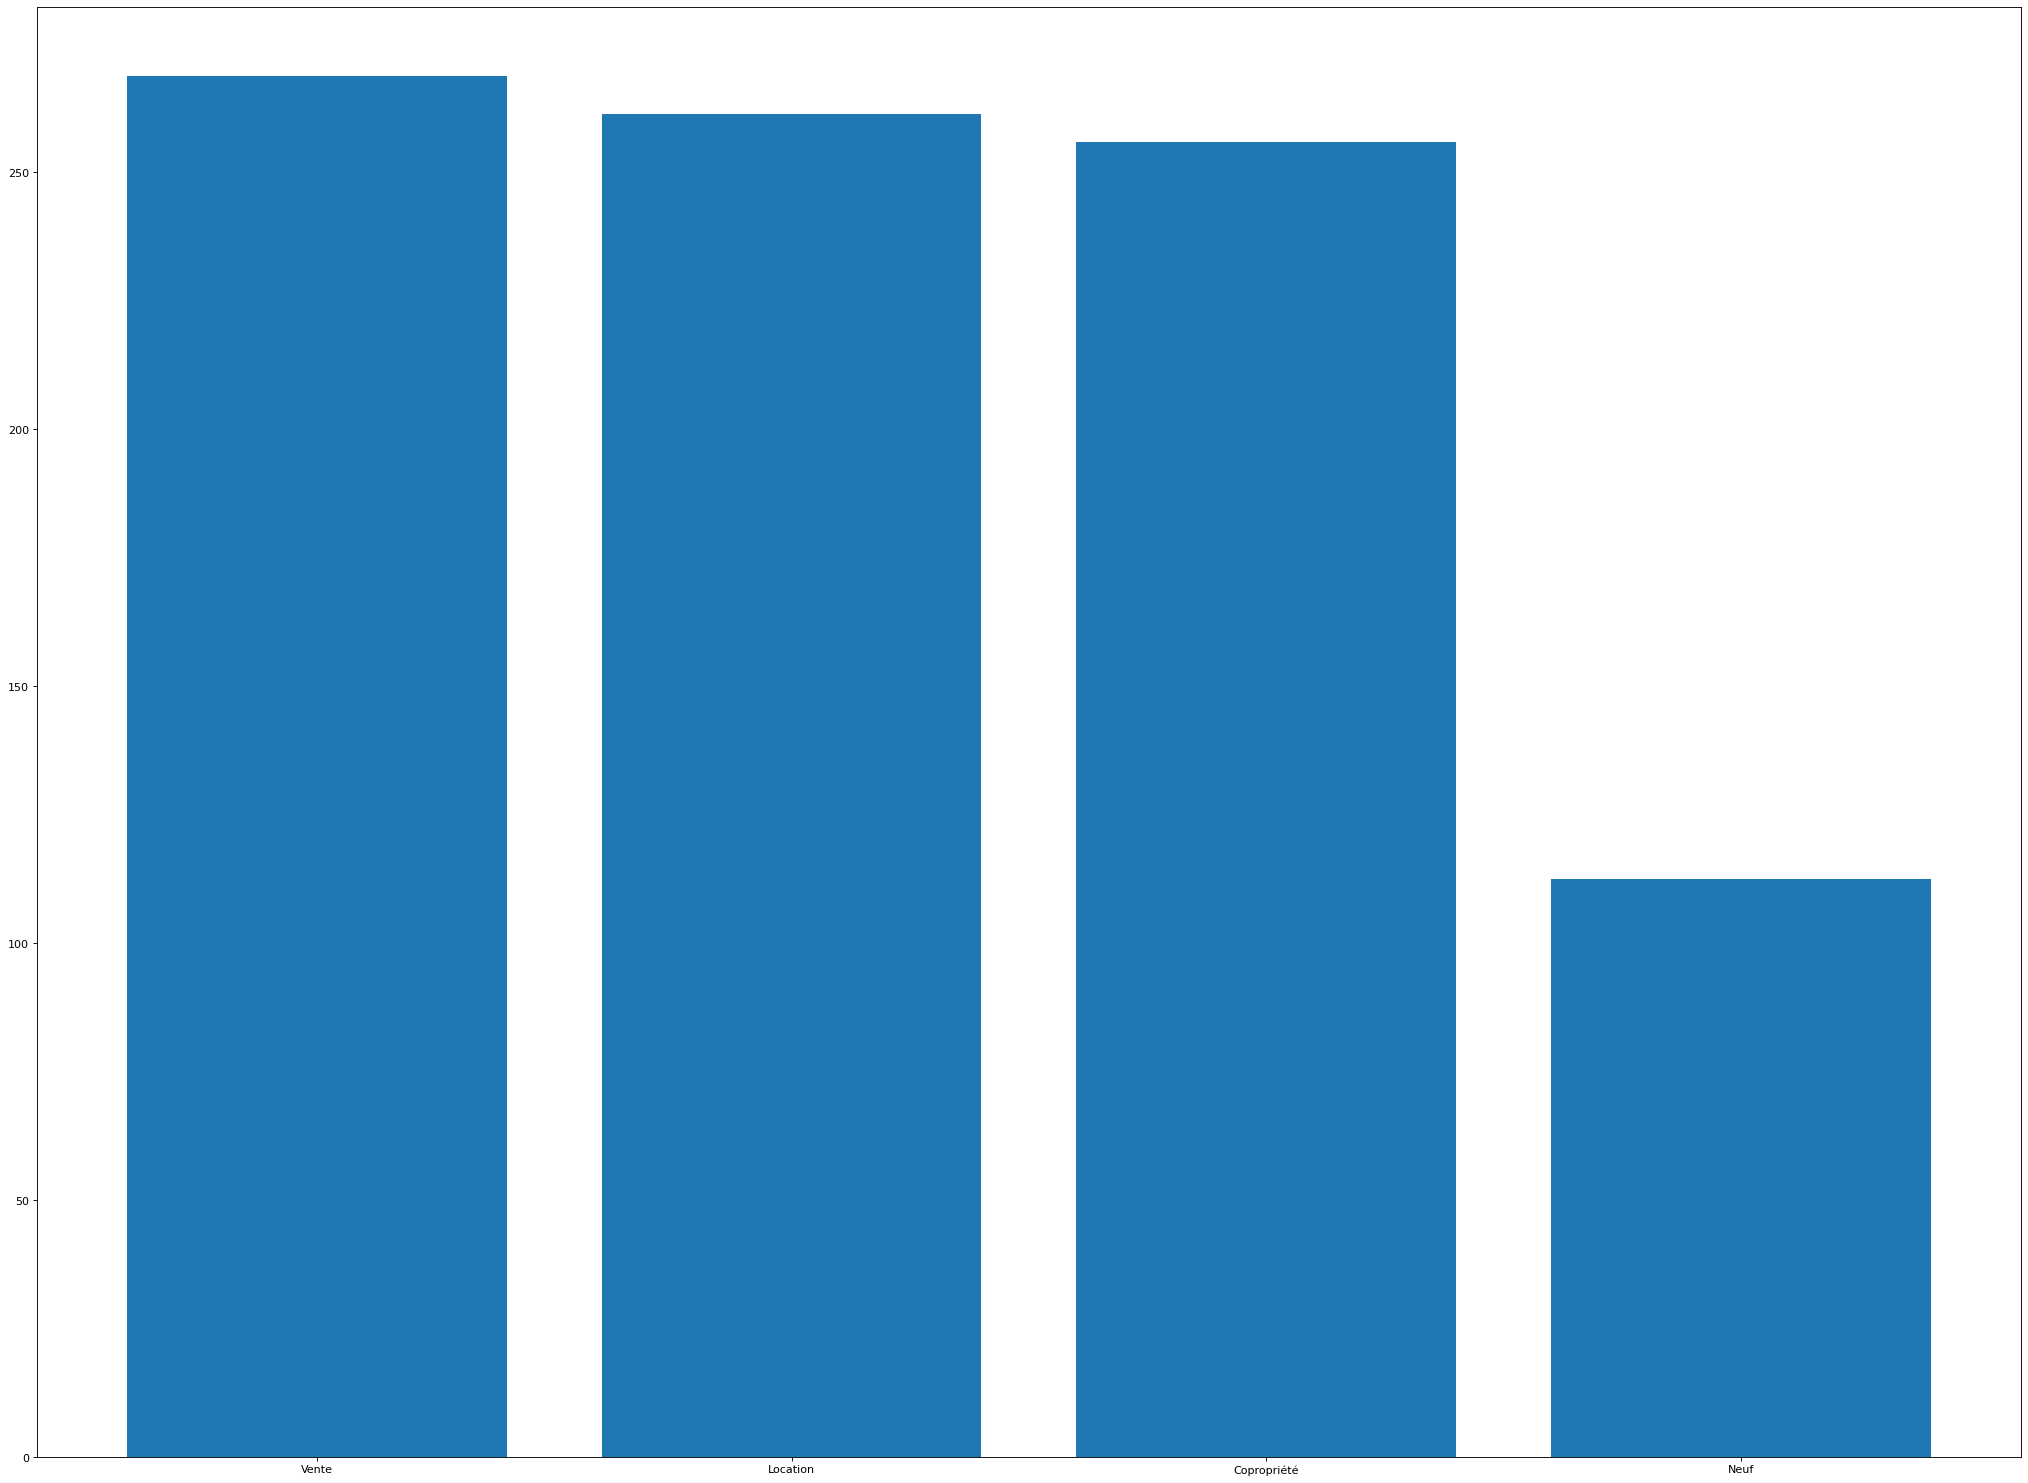

In [ ]:
position = (df['tr001_modele_dpe_type_libelle']).unique()
market_value_league = np.zeros(len(position))
j=0
for i in (position):
    print(i)
    market_value_league[j] = ((df['consommation_energie'][df['tr001_modele_dpe_type_libelle']==i].mean()))
    print(market_value_league[j])
    j+=1

    
market_value_league
fig = plt.figure(1,figsize=(32,24),dpi = 80)

plt.bar(position,market_value_league)

In [ ]:
### Identifier les zones ou nous trouvons des classes de consommation energivores 

In [ ]:
%matplotlib nbagg

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Est ce que la consommmation en energie augmente avec la surface thermique ? ( faire une corrélation entre les 2 variables)

In [ ]:
s1 = df['consommation_energie']

s2 = df['surface_thermique_lot']

In [ ]:
s1.corr(s2)*(1)

-0.1777517854474069

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (10, 5))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show(s1,s2)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  """


<IPython.core.display.Javascript object>

Deuxième corrélation

In [ ]:
s1 = df['estimation_ges']

s2 = df['surface_thermique_lot']

In [ ]:
s1.corr(s2)*(1)

-0.03611769423697273

# DATA VISUALISATION

In [ ]:
df['annee_construction'].unique()

array([1976, 2004, 2000, 1972, 1989, 1960, 1947, 1948, 1983, 1950, 1980,
       1995, 2006, 1970, 2003, 2008, 1993, 2001, 2013, 1985, 1978, 1990,
       1992, 2011, 1984, 2010, 1975, 1968, 2009, 2007, 1974, 1996, 1988,
       1977, 1949, 1952, 1956, 1920, 1966, 2002, 2005, 1911, 1965, 1930,
       1955, 1940, 1982, 1998, 1962, 1999, 1973, 1997, 1969, 2012, 1959,
       1958, 1922, 1963, 1964, 1971, 1979, 1994, 1981, 1991, 1908, 1987,
       1953, 1986, 1951, 1957, 1954, 1933, 1946, 1915, 1961, 1967, 1910,
       1944, 1904, 1931, 1939, 1945, 1935, 1901, 1923, 1932, 1914, 1938,
       1942, 1928, 1937, 1934, 1912, 1905])

In [ ]:
#df.annee_construction = df.annee_construction.astype(float)

In [ ]:
df.groupby(pd.cut(df['annee_construction'], np.arange(1940,2020,10)))['_id'].count()

annee_construction
(1940, 1950]    2950
(1950, 1960]     232
(1960, 1970]     385
(1970, 1980]    1372
(1980, 1990]    1145
(1990, 2000]     388
(2000, 2010]    1426
Name: _id, dtype: int64

In [ ]:
pip install cutecharts

In [ ]:

from cutecharts.charts import Line

In [ ]:
dfdistrib = df.groupby(pd.cut(df['annee_construction'], np.arange(1900,2025,5)))[['_id']].count()


In [ ]:
dfdistrib

,_id
annee_construction,
"(1900, 1905]",3
"(1905, 1910]",9
"(1910, 1915]",4
"(1915, 1920]",24
"(1920, 1925]",3
"(1925, 1930]",88
"(1930, 1935]",9
"(1935, 1940]",43
"(1940, 1945]",8


In [ ]:
titi = []
for i in range(24):
    titi.append(1900+i*5)

In [ ]:
print(titi)

[1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]


In [ ]:
toto = dfdistrib._id.to_list()

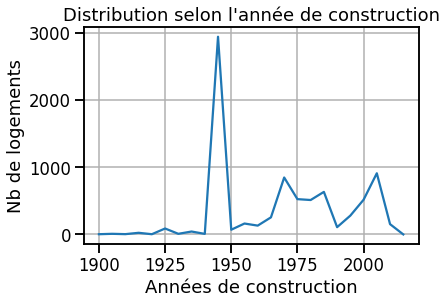

In [ ]:
fig, ax = plt.subplots()
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

ax.plot(titi,toto)

ax.set(xlabel='Années de construction', ylabel='Nb de logements',
       title='Distribution selon l\'année de construction')
ax.grid()

plt.savefig('figsize_test1.png',dpi=200)

a = plt.show()

In [ ]:
print(a)

None


In [ ]:
df = df.loc[(df['annee_construction'] > 1950 )]

**Le nombre de classe de consommation en énergie en fonction du temps**

In [ ]:
import pandas as pd
import json
import requests
from pathlib import Path
import numpy as np
import sys
import requests
import json
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [ ]:
pivot=df.pivot_table(index='annee_construction',columns='classe_consommation_energie',values='consommation_energie',aggfunc='count')

In [ ]:
pivot

In [ ]:
if sys.platform =='linux':
    path_d = Path('/mnt/d')
else:
    path_d = Path('D://')
data_dir = path_d/'data'/'dpe'/'upload'    

plot_dir = Path('.')/'plot'
plot_dir.mkdir(exist_ok=True,parents=True)

In [ ]:
dpe_color_palette=sns.color_palette('RdYlGn',7)
dpe_color_palette.reverse()
dpe_color_palette.append((0.9,0.9,0.9))

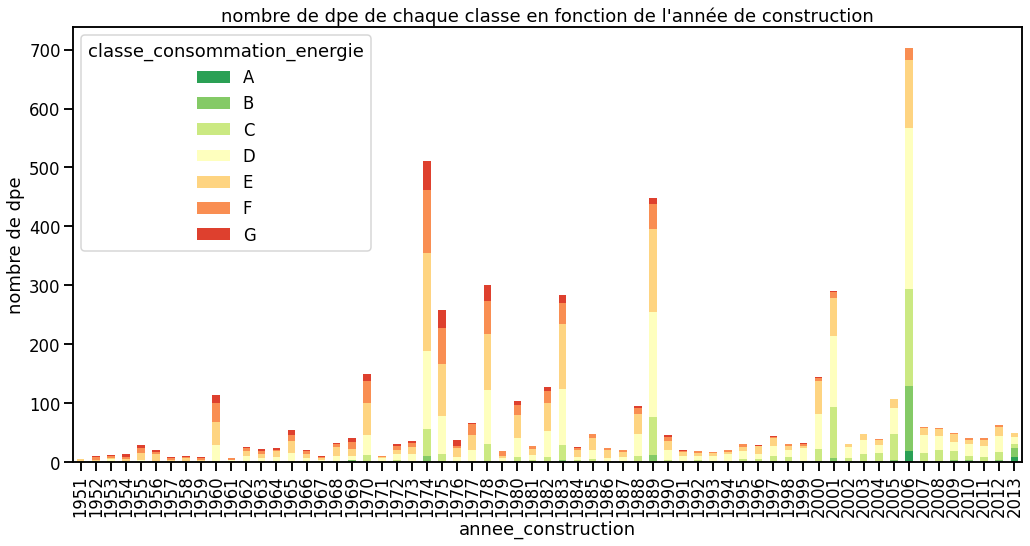

In [ ]:
ax=pivot.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('nombre de dpe')
ax.set_title("nombre de dpe de chaque classe en fonction de l'année de construction")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

**Fréquences selon l'année de construction, et la classe énérgétique**

In [ ]:
pivot3 = pd.crosstab(df['annee_construction'],df['classe_consommation_energie'],normalize='index')

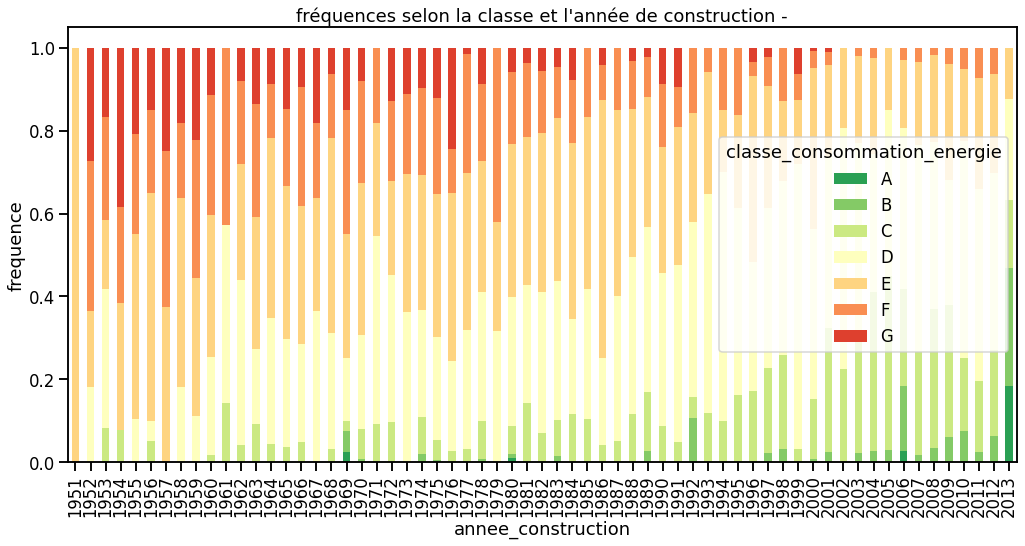

In [ ]:
ax=pivot3.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('frequence')
ax.set_title("fréquences selon la classe et l'année de construction -")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

On constate une évolution générale vers les étiquettes les moins énergivores au fur et à mesure des années, et cela dû aux différentes politiques publiques mise en place. ( Nouvelles réglementations concernant la construction des batiements)

**Moyenne de la consommation en énergie en fonction de chaque classe et pour chaques région**

In [ ]:

pivot2=df.pivot_table(index='Nom de la région',columns='classe_consommation_energie',values='consommation_energie',aggfunc='mean')

In [ ]:
pivot2

classe_consommation_energie,A,B,C,D,E,F,G
Nom de la région,,,,,,,
Auvergne-Rhône-Alpes,NaN,82.681667,129.320833,196.282012,286.208267,385.007315,569.014167
Bourgogne-Franche-Comté,26.000000,65.791429,124.409773,193.970488,283.811379,381.886182,548.701935
Bretagne,NaN,80.505000,124.194884,194.812317,279.291892,391.654722,577.248889
Centre-Val de Loire,34.840000,53.380000,130.393000,198.711368,284.114732,396.015849,611.951500
Corse,NaN,75.530000,125.885946,196.681930,272.495556,382.572000,531.790000
Grand-Est,NaN,64.125484,127.883056,190.906883,279.968493,385.344242,588.942273
Hauts-de-France,NaN,NaN,122.687500,195.509643,281.559756,392.237391,506.725000
Normandie,42.280000,73.266667,124.237778,193.983247,274.195385,390.938387,574.430000
Nouvelle-Aquitaine,32.073529,80.828824,128.012368,193.830000,278.183553,386.173188,552.606364


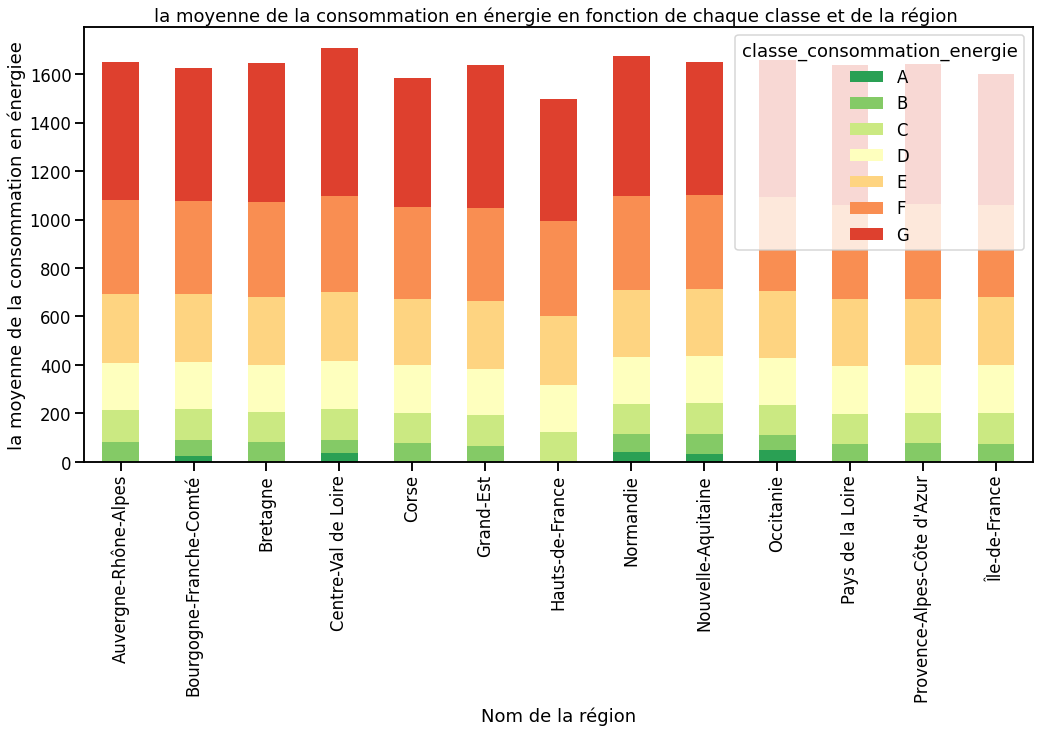

In [ ]:
ax=pivot2.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('la moyenne de la consommation en énergiee')
ax.set_title("la moyenne de la consommation en énergie en fonction de chaque classe et de la région ")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

**Visualisation pour chaque région, la moyenne de la consommation en énergie par classe**

In [ ]:
essaie_2 =df.groupby(["Nom de la région",'classe_consommation_energie'])['consommation_energie'].mean()

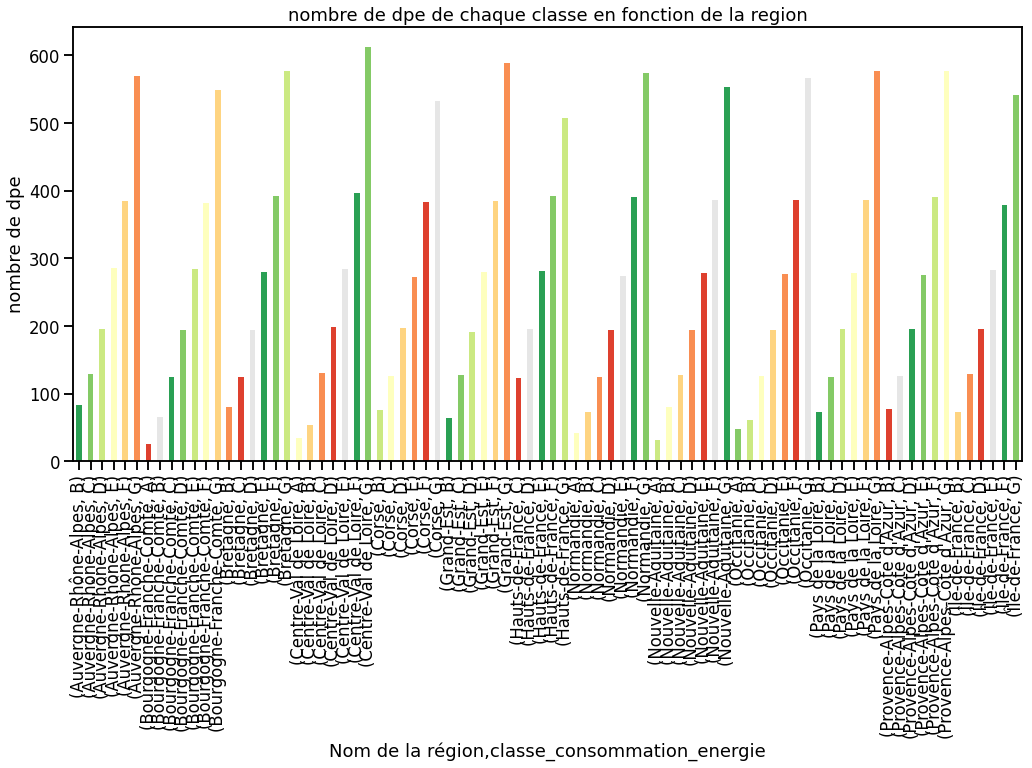

In [ ]:

ax=essaie_2.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('nombre de dpe')
ax.set_title("nombre de dpe de chaque classe en fonction de la region")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

**Calculer le nombre de classe énergérique en fonction de la région**

In [ ]:
essaie = df.groupby("Nom de la région")['classe_consommation_energie'].value_counts()

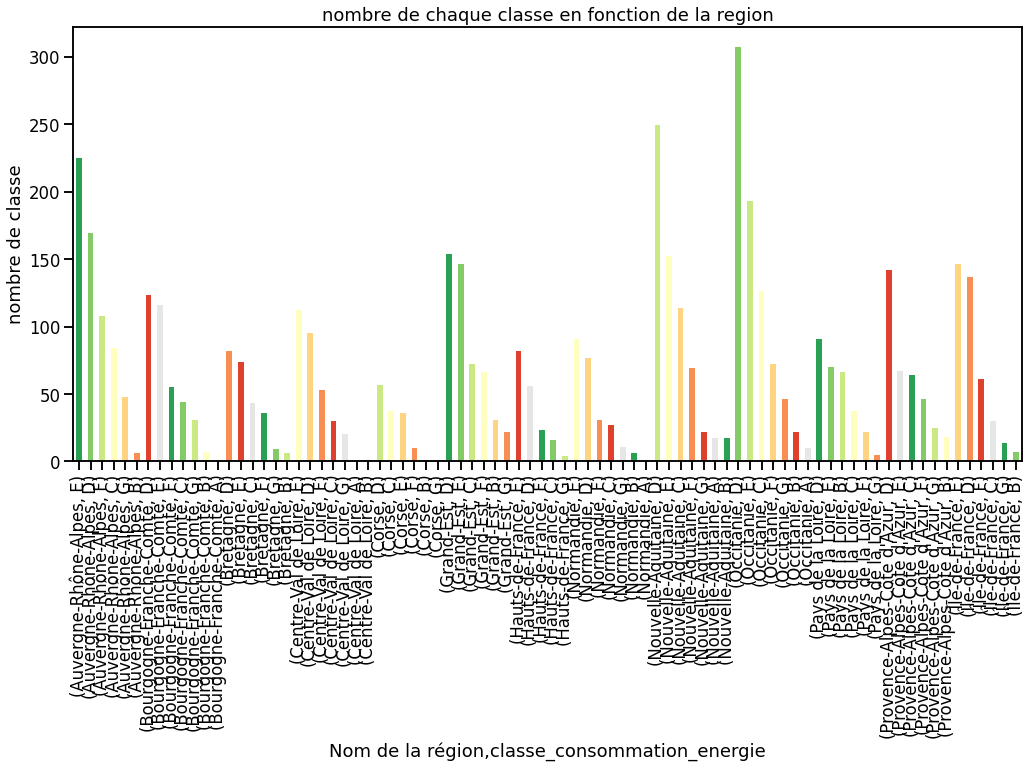

In [ ]:
ax=essaie.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('nombre de classe')
ax.set_title("nombre de chaque classe en fonction de la region")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

Pour chaque région, on a la classe de consommation

In [ ]:
pip install cutecharts


In [ ]:
from cutecharts.charts import Line

In [ ]:
SA = pd.crosstab(df['Nom de la région'],df['classe_estimation_ges'])

In [ ]:
pd.crosstab(df['Nom de la région'],df['classe_estimation_ges'])

classe_estimation_ges,A,B,C,D,E,F,G
Nom de la région,,,,,,,
Auvergne-Rhône-Alpes,15,60,201,154,95,59,56
Bourgogne-Franche-Comté,18,42,76,69,71,53,48
Bretagne,16,51,65,54,30,10,24
Centre-Val de Loire,12,52,97,49,46,34,22
Corse,27,53,41,14,5,0,2
Grand-Est,17,44,132,100,104,58,36
Hauts-de-France,7,21,48,28,34,30,13
Normandie,12,36,81,43,37,18,17
Nouvelle-Aquitaine,54,180,157,117,68,36,28


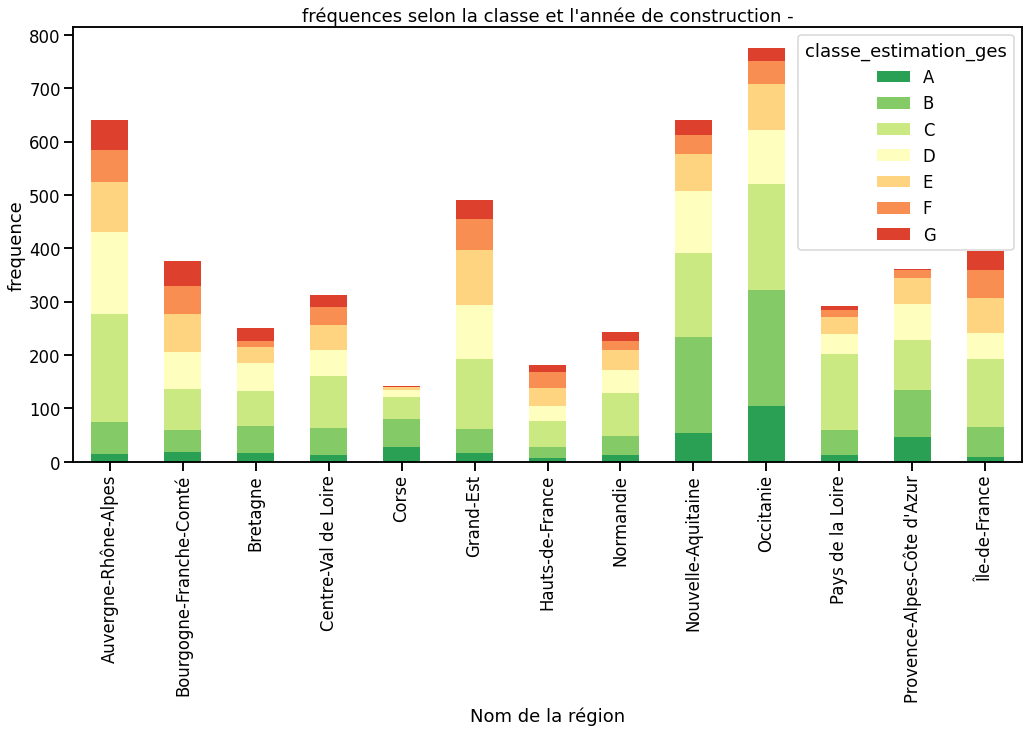

In [ ]:
ax=SA.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('frequence')
ax.set_title("fréquences selon la classe et l'année de construction -")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

In [ ]:
CI = pd.crosstab(df['tr001_modele_dpe_type_libelle'],df['classe_consommation_energie'])

In [ ]:
CI

classe_consommation_energie,A,B,C,D,E,F,G
tr001_modele_dpe_type_libelle,,,,,,,
Copropriété,0,0,6,14,12,4,0
Location,0,15,124,292,300,125,34
Neuf,27,111,17,56,20,0,0
Vente,3,62,577,1377,1178,523,224


In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

#### Analyse au sein du département 76

In [ ]:
df['code_insee_commune_actualise']

2       63000
3       63000
4       01340
5       01100
6       01400
        ...  
9995    95051
9996    95400
9997    95176
9998    95306
9999    95598
Name: code_insee_commune_actualise, Length: 5101, dtype: object

In [ ]:
df['tv016_departement_code']

2       01
3       01
4       01
5       01
6       01
        ..
9995    95
9996    95
9997    95
9998    95
9999    95
Name: tv016_departement_code, Length: 5101, dtype: object

In [ ]:
df['tv016_departement_code'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
normandie = (df.loc[df['Nom de la région']=="Normandie",:])

In [ ]:
normandie.shape

(244, 23)

In [ ]:
normandie['tv016_departement_code'].unique()

array(['14', '27', '50', '61', '76'], dtype=object)

14
274.71629032258056
27
243.59760563380277
50
252.87333333333336
61
251.67159999999996
76
249.22821428571427


<BarContainer object of 5 artists>

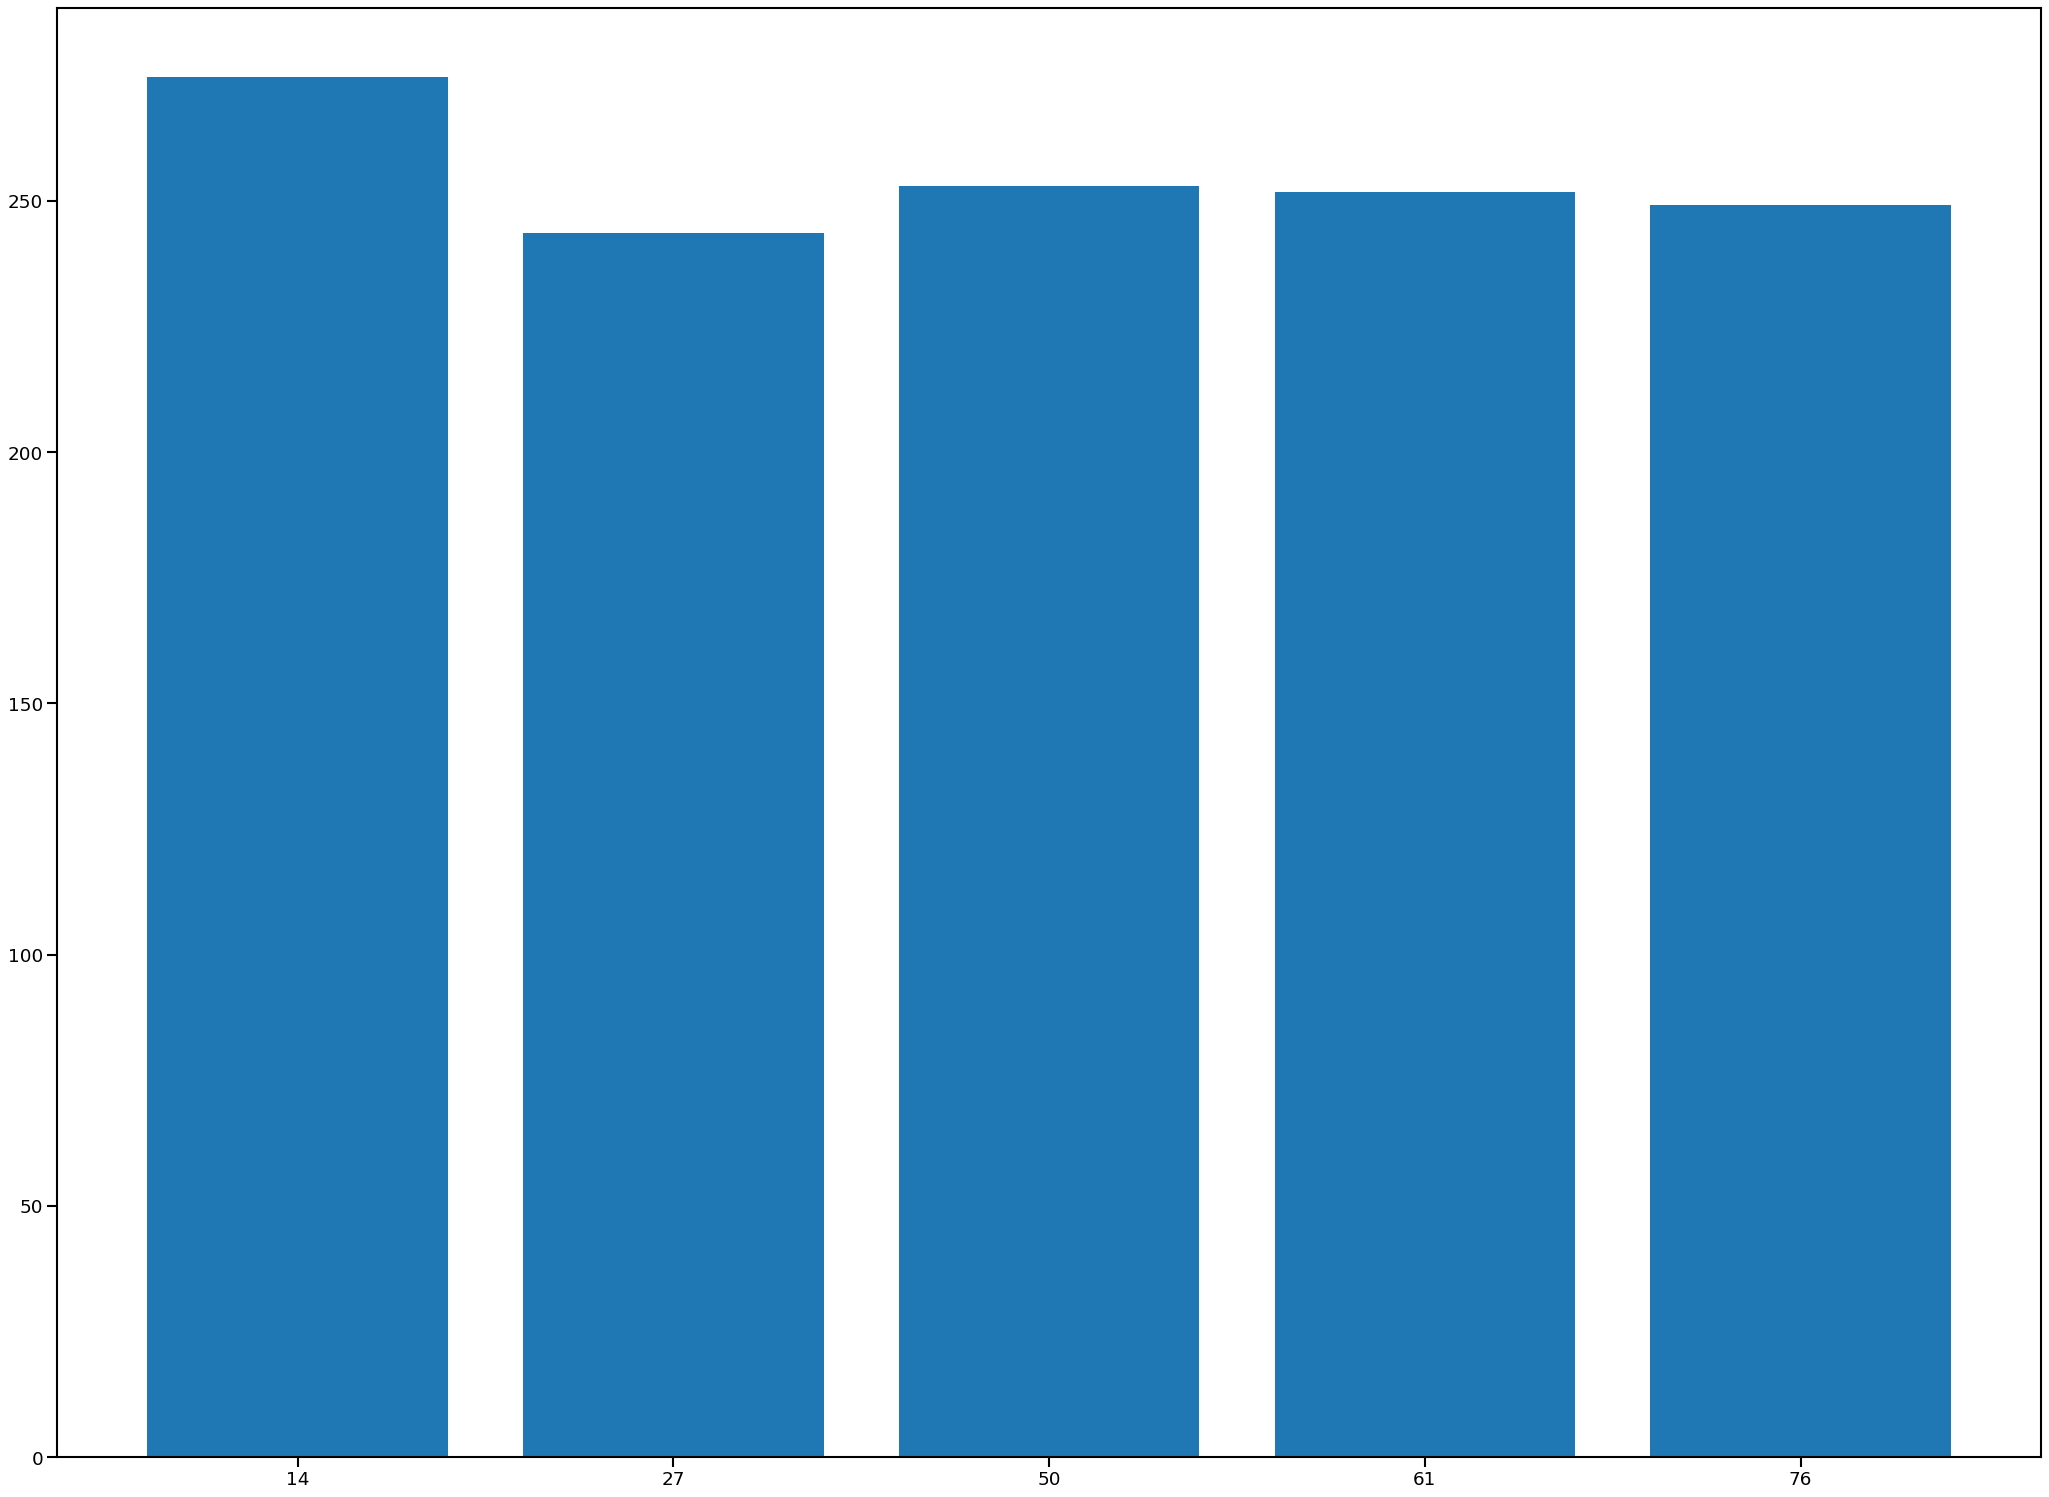

In [ ]:
position = (normandie['tv016_departement_code']).unique()
market_value_league = np.zeros(len(position))
j=0
for i in (position):
    print(i)
    market_value_league[j] = ((df['consommation_energie'][df['tv016_departement_code']==i].mean()))
    print(market_value_league[j])
    j+=1

    
market_value_league
fig = plt.figure(1,figsize=(32,24),dpi = 80)

plt.bar(position,market_value_league)

In [ ]:
normandie["tv016_departement_code"].value_counts()

27    71
14    62
76    56
50    30
61    25
Name: tv016_departement_code, dtype: int64

##### Département de la Seine-Maritime

In [ ]:
normandie["tv016_departement_code"]

1365    14
1366    14
1367    14
1370    14
1371    14
        ..
8013    76
8014    76
8016    76
8017    76
8023    76
Name: tv016_departement_code, Length: 244, dtype: object

In [ ]:
rouen = normandie.loc[(normandie['tv016_departement_code'] == "76")]

In [ ]:
rouen.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
rouen

In [ ]:
rouen['code_insee_commune_actualise'].unique()

array(['76183', '76291', '76910', '76470', '76540', '534 904 529',
       '76530', '76259', '76', '76165', '76306', '76451', '76228',
       '76727', '76135', '76160', '76057', '76194', '76088', '76095',
       '76079', '76108', '76046', '76039', '76594', '76509', '76497',
       '76069', '76014', '76231', '76011', '76018', '76351', '76616',
       '76280', '76750', '76401', '76202', '76048', '76190', '76260'],
      dtype=object)

Moyenne de la consommation en énergie pour les communes du département Seine Maritime

76183
223.4766666666667
76291
299.81
76910
239.0
76470
399.5
76540
246.00666666666666
534 904 529
180.89
76530
144.0
76259
280.38
76
310.885
76165
299.94
76306
278.03
76451
222.2
76228
243.91
76727
145.37
76135
178.85
76160
156.78
76057
166.74
76194
268.29999999999995
76088
276.73
76095
290.0
76079
89.43
76108
124.88333333333333
76046
92.875
76039
254.9
76594
426.61
76509
210.5
76497
154.09
76069
402.86
76014
175.34
76231
299.885
76011
314.19
76018
344.31
76351
249.42333333333332
76616
231.81
76280
272.03
76750
272.94
76401
273.77
76202
288.81
76048
264.69
76190
342.0
76260
296.0


<BarContainer object of 41 artists>

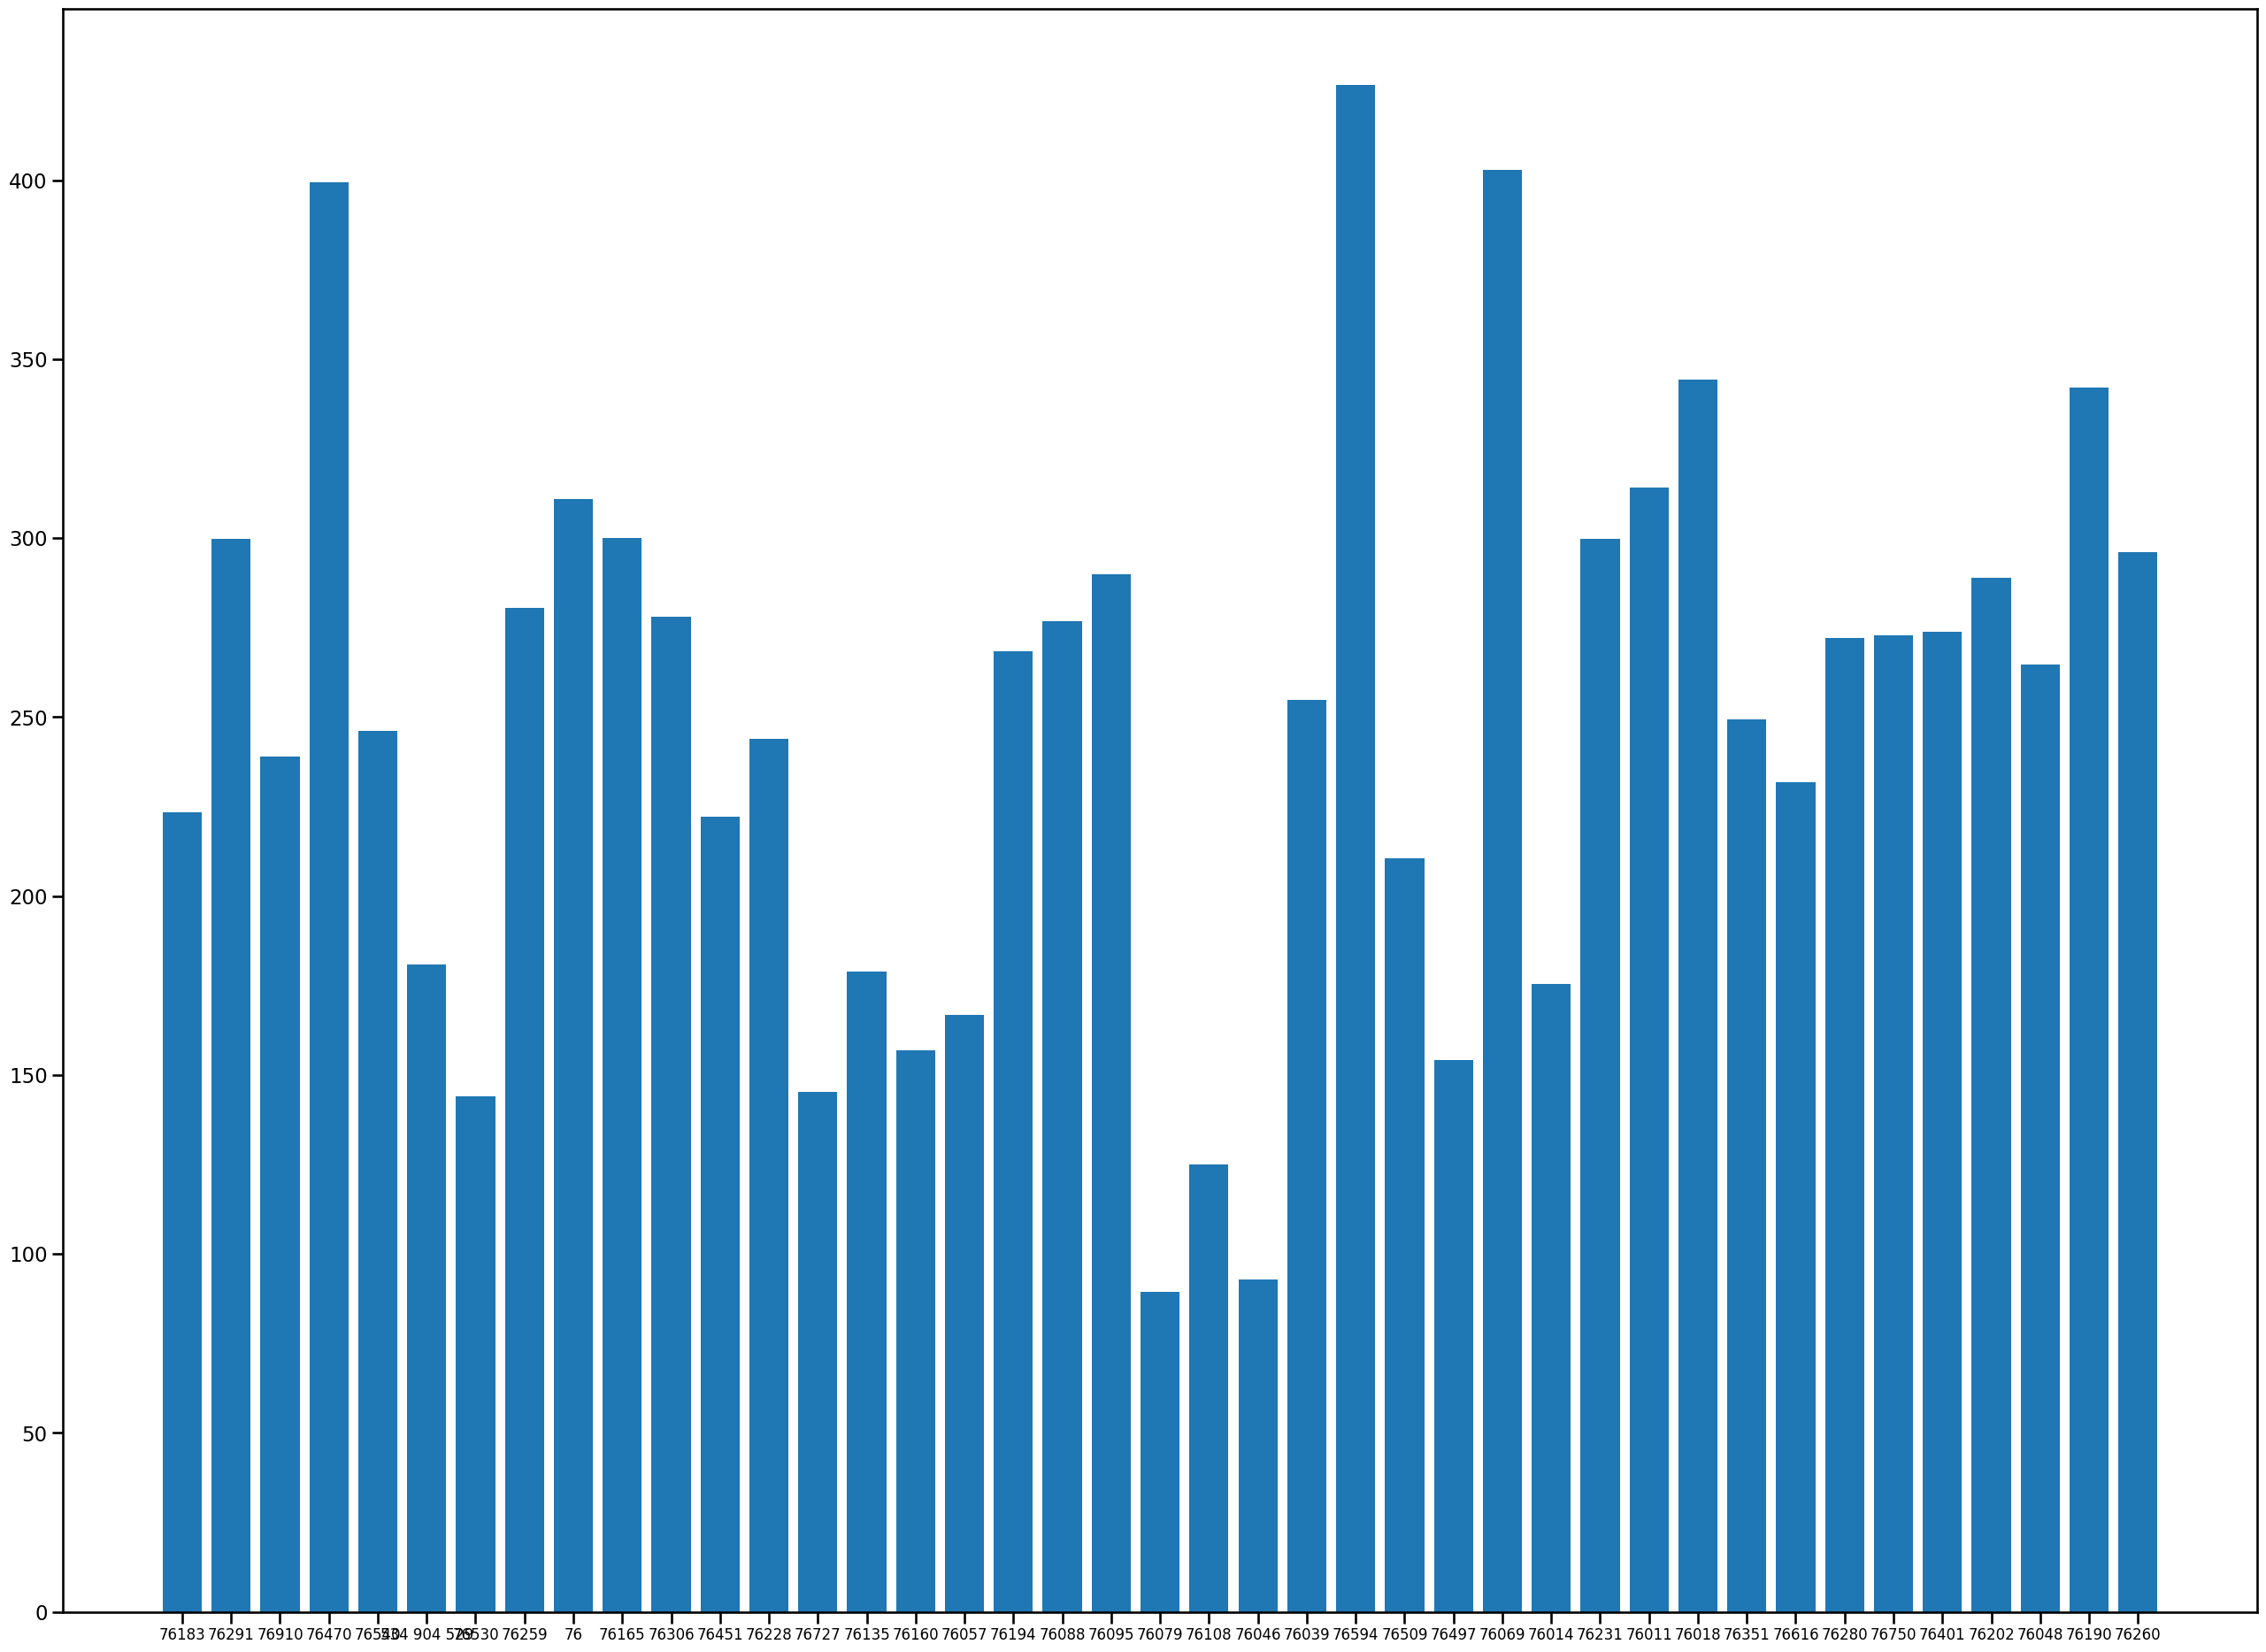

In [ ]:
position = (rouen['code_insee_commune_actualise']).unique()
market_value_league = np.zeros(len(position))
j=0
for i in (position):
    print(i)
    market_value_league[j] = ((rouen['consommation_energie'][rouen['code_insee_commune_actualise']==i].mean()))
    print(market_value_league[j])
    j+=1

    
market_value_league
fig = plt.figure(1,figsize=(32,24),dpi = 100)
matplotlib.pyplot.xticks(fontsize= 12)

plt.bar(position,market_value_league)

In [ ]:
rouen = rouen.loc[(rouen['code_insee_commune_actualise'] == "76540")]

### Consommation énergétique selon le type de logements

In [ ]:
df.columns

Index(['classe_consommation_energie', 'tr001_modele_dpe_type_libelle',
       'annee_construction', '_geopoint', 'latitude', 'surface_thermique_lot',
       '_i', 'tr002_type_batiment_description', 'geo_adresse', '_rand',
       'code_insee_commune_actualise', 'estimation_ges', 'geo_score',
       'classe_estimation_ges', 'version_methode_dpe', 'nom_methode_dpe',
       'tv016_departement_code', 'consommation_energie',
       'date_etablissement_dpe', 'longitude', '_score', '_id',
       'Nom de la région'],
      dtype='object')

In [ ]:
pivot4 = pd.crosstab(df['tr002_type_batiment_description'],df['classe_consommation_energie'],normalize='index')

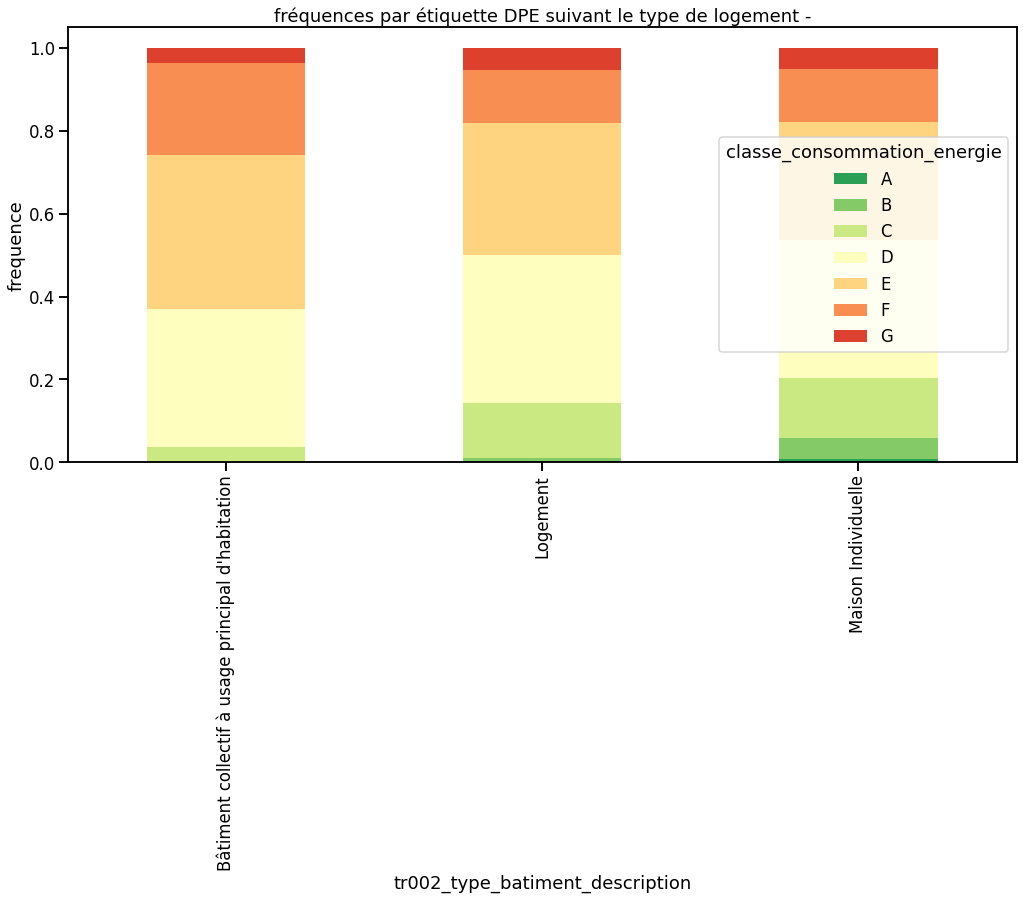

In [ ]:
ax=pivot4.plot.bar(stacked=True,figsize=(17,8),color=dpe_color_palette)
ax.set_ylabel('frequence')
ax.set_title("fréquences par étiquette DPE suivant le type de logement -")
plt.savefig(str(plot_dir/'etiquettes_vs_periodes.png'),bbox_inches='tight')

Observer dans quel type de bâtiments nous observons des logements très énergivores( étiquettes F et G du DPE)

#  **Conclusion du Sujet : Perspective d'amélioration**

- Croiser d'autre type de donnée provenant de différentes sources
- Prendre conscience de l'existence des anomalies(valeurs aberrantes, etc.) et les corriger
- Mettre en place des tests de corrélation pour évaluer une association entre les variables
- Mettre en place des modèles économétriques pour quantifier l'effet de l'influence d'un ensemble de variables explicatives X sur une variable à expliquée Y
